# Predicting TripAdvisor Review Sentiment

**Author**: Albane Colmenares <br>
**Date**: January 4th, 2024 <br>
___________________________________________________________________________

### Table of Content
**1. [Overview](#overview)**<br>
**2. [Business Understanding](#business_understanding)**<br>
**3. [Data Understanding](#data_understanding)**<br>
**4. [Data Preparation](#data_preparation)**<br>
**5. [Modeling](#modeling)**<br>
**6. [Evaluation](#evaluation)**<br>
**7. [Findings & Recommendations](#findings_n_recommendations)**<br>
**8. [Limits & Next Steps](#limits_n_next_steps)**<br>


<a id='overview'></a>

## 1. Overview

This notebook examines reviews about hotels from guests who stayed there and predicts whether the sentiment of reviews is positive or negative. <br>
The organization of this notebook follows the CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process.


<a id='business_understanding'></a>

## 2. Business Understanding

----------NOT MODIFIED----------

We, as the agency entrusted by Samsung, have been tasked with shaping the marketing strategy for the imminent <u>launch</u> of their cutting-edge <u>folding tablet</u>. 
<br>Due to the unique nature of the product, substantial funds were allocated for research and development. Consequently, there is a constraint on budget for the launch phase. 
<br>Nevertheless, Samsung aims to generate significant buzz around this groundbreaking product, confident that its innovation will speak for itself. 


In our initial conversations, it was recommened that the product be unveiled at South by Southwest, a major conference in the industry. The event has an `Interactive` division, which focuses on new technology where speakers, parties and trade shows are hosted. 

The objective of this project has two main aspects: 
1. Analyze the success stories of the two technology leaders in the industry at South by Southwest 
    * Identify factors that were received positively to understand dynamics of a successful launch - and not positive responses to know what to avoid
2. Predict the tweets' sentiment 
    * Every strategy needs to measure the Return On Investment. Predicting tweet sentiment will provide a quantifiable metric to evaluate the efficacy of the deployed strategy.
    
    
The target audience is Samsung marketing strategy teams.


----------NOT MODIFIED----------


<a id='data_understanding'></a>

## 3. Data Understanding

----------NOT MODIFIED----------

* **Data Source**

The data comes from CrowdFlower via [data.world](https://data.world/crowdflower/brands-and-product-emotions). 

Tweets about the two leading technology brands and products were grouped into the dataset. The tweets were categorized by the sentiment that was expressed: positive, negative or neutral. The product or brand referenced by the short text is also indicated when known. 

The file `judge-1377884607_tweet_product_company.csv` can be downloaded at the provided link. 
It was then renamed to `tweet_product_company.csv`and saved into the current folder, within the 'data' subfolder, to be accessed into the raw DataFrame. 


* **Features**

Prior to preprocessing, the columns are: 

* `tweet_text`: the actual tweet's record
* `emotion_in_tweet_is_directed_at`: the product or company referred to in the tweet
* `is_there_an_emotion_directed_at_a_brand_or_product`: the tweet's sentiment

* **Target**

The tweet's sentiment is the target for the dataset. The specific column is `is_there_an_emotion_directed_at_a_brand_or_product`. Based on a given set of tweets, we will try to predict if the tweet's emotion was positive, negative or neutral. 

----------NOT MODIFIED----------

* **Loading the data**

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import nltk

%matplotlib inline

The text file is encoded using Latin-1 encoding - and is open as is. Several encodings were tried to ensure the right one matched: utf-8, utf-16, ascii for example.

In [3]:
# Loading dataset and saving it as raw_df
raw_df = pd.read_csv('data/tripadvisor_hotel_reviews.csv.zip', compression="zip", encoding='latin-1')

In [4]:
# Inspecting the first 5 rows of the DataFrame
raw_df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [23]:
# Printing the number of rows and columns in the dataset
print(f'The dataset has {len(raw_df)} rows and 2 columns.' )

The dataset has 20491 rows and 2 columns.


The reviews refer to the Kimpton Hotel Monaco Seattle, and seems to have the 5 rating, let's verify if this is the case and how many reviews there are by rating.

In [7]:
# Inspecting the number of tweets referring to each rating
raw_df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


<a id='data_preparation'></a>

## 4. Data Preparation

## 4: 1- <u>Data Cleaning</u>

For a better readability of the reviews, the column width will be increased.

This [link](https://www.tripadvisor.com/ShowTopic-g1-i12105-k11476502-What_is_the_maximum_character_limit_on_a_review-Tripadvisor_Support.html) from TripAdvisor suggests the maximum number of characters for reviews is 20,000. We will set the limit to 20,000 to ensure all words are encounted for.  

In [18]:
# Increasing column width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 20000)

In [19]:
# Inspecting the first 5 rows of the DataFrame now that there no longer is a limitted width
raw_df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

Despite increasing the column width, some reviews are not finished. This was verified inside the raw data, which confirms the reviews were not provided entirely. 

### 4. a) Copying the raw data

In order to keep the raw data as it is in case it needs to be accessed in the future, an exact copy of the dataset will be made. The new DataFrame `df` contains the same columns:
* `Review`
* `Rating`

In [25]:
# Making a copy of the raw DataFrame to modify it
df = raw_df.copy()

In [26]:
# Verifying the changes applied  
df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

### 4. b) Missing data

In the next section, the missing values are inspected. 
<br>
None of the two columns have null data, no modification is necessary. 

In [27]:
# Looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### 4. c) Handling duplicates

No duplicate rows were identified. No changes are necessary. 

In [28]:
# How many rows were duplicates
print(str(len(df[df.duplicated()])) + f' duplicate rows were identified.')

0 duplicate rows were identified.


In [29]:
# Verifying there are no duplicate rows
df[df.duplicated()]

,Review,Rating


### 4. d) Categorizing the ratings into a binary classification

* **Product or Company**

The product or company column does not have an impact on whether a tweet is positive or not positive, so it will not be transformed as it will not be used further for predictions. 

* **Sentiment**

Four sentiment categories are described, which could be grouped in two: positive and not positive. 
<br>This is what will be covered over the next section. 

In [26]:
# Number of rows by emotion
df['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64

* **Categorizing**

Due to the nature of the target, we will focus on the positive ones. Hence all the other tweets, whether they are neutral or negative, will be considered ***not positive***. For easier reference, it will be identified as ***negative***.

In [27]:
# Defining the new classifications for the sentiment column 
classification_columns = {
    'sentiment': {
        "No emotion toward brand or product": "negative", 
        "I can't tell": "negative", 
        "Positive emotion": "positive", 
        "Negative emotion": "negative" 
    }
}

We will now convert the sentiment column.

In [28]:
# Converting the sentiment column classification

# Defining columns to change
column_classification = ['sentiment']

def convert_class(df, columns_mapping):
    for column, mapping in columns_mapping.items():
        print('Before: ' + column, df[column].unique())
        df[column] = df[column].map(mapping)
        print('After: ' + column, df[column].unique())
    

In [29]:
# Calling the function to convert the classification into a binary one
convert_class(df, classification_columns)

Before: sentiment ['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]
After: sentiment ['negative' 'positive']


In [30]:
# Rewiewing the new categorization of rows by unique sentiment
df['sentiment'].value_counts()

negative    6100
positive    2970
Name: sentiment, dtype: int64

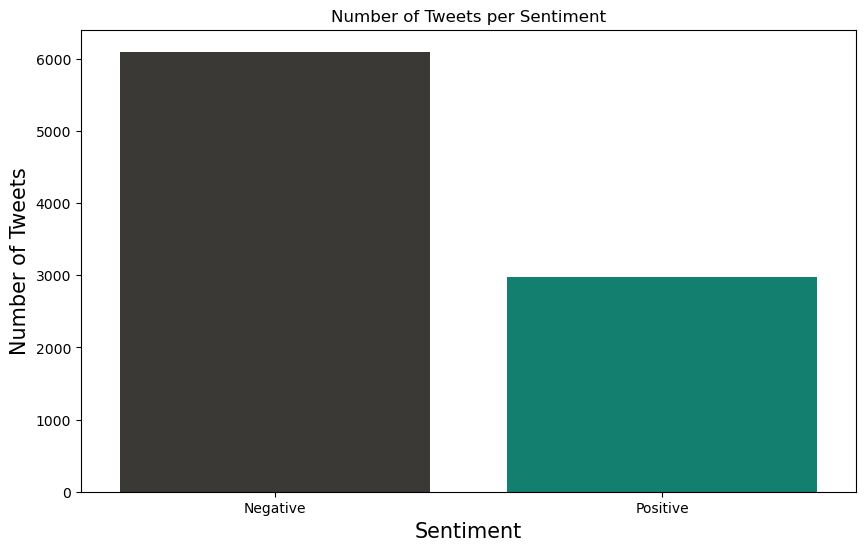

In [31]:
# Creating a bar chart for to visualize class imbalance
fig, ax = plt.subplots(figsize=(10,6))

# Defining custom colors 
custom_colors = ['#3B3935', '#00917C']

sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette=custom_colors)

ax.set_xlabel(xlabel = 'Sentiment', fontsize=15)
ax.set_ylabel(ylabel = 'Number of Tweets', fontsize=15)

ax.set_xticklabels(labels=['Negative', 'Positive'])

ax.set_title(f'Number of Tweets per Sentiment')

 # Saving the plot as a PNG with a transparent background
plt.savefig('images/tweets_per_sentiment.png', transparent=True)

plt.show()

### 4. e) Performing a Train-Test Split

The dataset is being divided into two separate subsets: a training set, and a testing (or validation) set. The validation set will allow to assess the performance of the model.

Two parameters are assigned when dividing the dataset:
* random_state=42
    * setting a random seed of 42 ensures that the data split is reproducible
* stratify=y
    * stratified sampling ensures the class distribution is maintained in both sets to address potential class imbalance issues

In [32]:
# Splitting df into X and y
X = df.drop('sentiment', axis=1)
y = df['sentiment']

In [33]:
# Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [34]:
# Inspecting the X_train data
X_train.head()

,tweet,product_or_company
8268,Huge shout out to GSDM &amp; Google for the kick ass party tonight! We had an unbelievable time. #SXSW,Google
945,#SXSW 20% of Google searches are for local information: Marissa Mayer. 6 million places claimed by their owners and logged by #Google,undefined
8832,free #sxsw playlist.. enjoy {link},undefined
7771,Awesome! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw,Android App
1643,#justmet @mention who worked for Apple for 25 years! #SXSW,Apple


In [35]:
# Inspecting the y_train data 
y_train.head()

8268    positive
945     negative
8832    negative
7771    positive
1643    positive
Name: sentiment, dtype: object

* **Distribution of Target**

In [36]:
# Counting the values of sentiment categories   
train_target_counts = pd.DataFrame(y_train.value_counts())
train_target_counts.index.name = 'target name'
train_target_counts.rename(columns={'sentiment': 'count'}, inplace=True)

# Inspecting the grouped results
train_target_counts

,count
target name,
negative,4575
positive,2227


* **Visually Inspecting Features**

In [37]:
# Making a sample of 5 records to display the full text of each
train_sample = X_train.sample(5, random_state=22)
train_sample['label'] = [y_train[val] for val in train_sample.index]
train_sample.style.set_properties(**{'text-align': 'left'})

,tweet,product_or_company,label
3586,Dang it. I've touched an iPad 2. I WANT! *sigh* #SXSW,iPad,positive
3901,Has made it into the press room got the swag and registered for an iPad 2. Hopefully get to meet mike tyson and @mention #sxsw,undefined,negative
133,"#Samsung, #Sony follow #Apple, #HP lead @mention {link} #Austin #atx #SXSW",undefined,negative
7937,UberGenius: Uber Is Taking Control of SXSW Pedicabs {link} #iPhone #LIVESTRONG #NewYorkCity #SanFrancisco #SXSW,undefined,negative
85,Stay tune @mention showcase #H4ckers {link} #SXSW,undefined,negative


## 4: 2- <u>Data Preprocessing & Exploratory Analysis</u>

In order to preprocess the tweets, the following transformations were performed: 
* **Standardizing case**
    <br>This step is important to ensure text is uniform and consistent. This prevents models from treating words with different cases as different ones
    
* **Tokenizing**
    <br>Tokens of one or two consecutive words were created. This was done with the `RegexpTokenizer` package from nltk.tokenize <br>
* **Stopwords** 
    <br>To focus on the data's theme, English stopwords were removed. Manual additions were made in this text's context (i.e. "sxsw", "mention")  
* **Lemmatize** 
    <br> The `WordNetLemmatizer` package from nltk.stem.wordnet was used to reduce words to their base form, allowing a more accurate analysis
* **Frequency Distribution**
    <br>The `FreqDist` package was used to review in a dictionary-like output, the words and their frequencies
* **WordCloud**
    <br> The words' frequencies were represented visually thanks to the `WordCloud` package
* **Bigrams**
    <br> Bigrams were drawn to have a better understanding of the themes, i.e. pop was identified with pop-up store, thanks to the `collocations` package and its BigramAssocMeasures
* **Mutual Information Scores**
    <br> Bigrams that occur more than 5 times were examined through `mutual information scores`

Before any transformation is done, a copy of the tweet column will be done so the original one can always be accessed. 

In [38]:
# Duplicating the column tweet
X_train['tweet_original'] = X_train['tweet']

In [39]:
# Verifying the new column was correctly created
X_train.head()

,tweet,product_or_company,tweet_original
8268,Huge shout out to GSDM &amp; Google for the kick ass party tonight! We had an unbelievable time. #SXSW,Google,Huge shout out to GSDM &amp; Google for the kick ass party tonight! We had an unbelievable time. #SXSW
945,#SXSW 20% of Google searches are for local information: Marissa Mayer. 6 million places claimed by their owners and logged by #Google,undefined,#SXSW 20% of Google searches are for local information: Marissa Mayer. 6 million places claimed by their owners and logged by #Google
8832,free #sxsw playlist.. enjoy {link},undefined,free #sxsw playlist.. enjoy {link}
7771,Awesome! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw,Android App,Awesome! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw
1643,#justmet @mention who worked for Apple for 25 years! #SXSW,Apple,#justmet @mention who worked for Apple for 25 years! #SXSW


### 4: 2- a) Standardizing Case

We will glance at the first sample of tweet to get an idea of whether we need to standardize case.  

In [40]:
# Isolating the first tweet into windows_sample
tweet_sample = train_sample.iloc[0]["tweet"]
tweet_sample

"Dang it. I've touched an iPad 2. I WANT!  *sigh* #SXSW"

* **Lower case**

Changing to lower case is necessary. We will apply this to the first tweet sample. 

In [41]:
# Transforming sample data to lowercase
tweet_sample.lower()

"dang it. i've touched an ipad 2. i want!  *sigh* #sxsw"

This answers our needs - we will apply this to our sample

In [42]:
# Transforming sample data to lowercase
train_sample['tweet'] = train_sample['tweet'].str.lower()
# Displaying full text
train_sample.style.set_properties(**{'text-align': 'left'})

,tweet,product_or_company,label
3586,dang it. i've touched an ipad 2. i want! *sigh* #sxsw,iPad,positive
3901,has made it into the press room got the swag and registered for an ipad 2. hopefully get to meet mike tyson and @mention #sxsw,undefined,negative
133,"#samsung, #sony follow #apple, #hp lead @mention {link} #austin #atx #sxsw",undefined,negative
7937,ubergenius: uber is taking control of sxsw pedicabs {link} #iphone #livestrong #newyorkcity #sanfrancisco #sxsw,undefined,negative
85,stay tune @mention showcase #h4ckers {link} #sxsw,undefined,negative


This answers our needs - we will apply this to our full dataset

### 4: 2- b) Tokenizing

The second fundamental data cleaning step is to tokenize the text data.

In [43]:
# Reviewing one of our train_sample tweets
tweet_sample

"Dang it. I've touched an iPad 2. I WANT!  *sigh* #SXSW"

We will use `RegexpTokenizer` from NLTK to create tokens of tow or more consecutive word characters, which include letters, numbers and underscores.

* **Tokenizing Pattern**

In [44]:
# Importing RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

# Instantiating the tokenizer
tokenizer = RegexpTokenizer(basic_token_pattern)

# Tokenizing the tweets
tweet_tokenized = tokenizer.tokenize(tweet_sample)
tweet_tokenized

['Dang', 'it', 've', 'touched', 'an', 'iPad', 'WANT', 'sigh', 'SXSW']

We will now apply it to our full sample

In [45]:
# Applying the tokenizer on the full train sample
train_sample['tweet'] = train_sample['tweet'].apply(lambda x: tokenizer.tokenize(x))

In [46]:
# Inspecting it
train_sample['tweet']

3586                                                                                                   [dang, it, ve, touched, an, ipad, want, sigh, sxsw]
3901    [has, made, it, into, the, press, room, got, the, swag, and, registered, for, an, ipad, hopefully, get, to, meet, mike, tyson, and, mention, sxsw]
133                                                                             [samsung, sony, follow, apple, hp, lead, mention, link, austin, atx, sxsw]
7937                                [ubergenius, uber, is, taking, control, of, sxsw, pedicabs, link, iphone, livestrong, newyorkcity, sanfrancisco, sxsw]
85                                                                                                    [stay, tune, mention, showcase, h4ckers, link, sxsw]
Name: tweet, dtype: object

### 4: 2- c) Stopwords

Then, we will be removing stopwords so we can focus on the the text data's theme.

Typical list of stopwords to which we will add:
* `sxsw`: the name of the conference 
* `mention`: when tweeted
* `link`: ?
* `RT`: retweet 

In [47]:
# Importing relevant packages
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# Creating list to store stopwords
stopwords_list = stopwords.words('english')
stopwords_list[:5]

['i', 'me', 'my', 'myself', 'we']

Some words are manually added to the list of stopwords, as they are in reference with tweets only. For

In [48]:
# Storing words to add to list of stopwords
manual_stopwords = ['sxsw', 'mention', 'link', 'rt']

# Adding to list of stopwords
for word in manual_stopwords:
    stopwords_list.append(word)

In [49]:
# Verifying the new words were added
stopwords_list[-len(manual_stopwords):]

['sxsw', 'mention', 'link', 'rt']

In [50]:
# Defining function that takes in a list of strings and returns only those that are not in the list
def remove_stopwords(token_list, stopwords_list):
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed


In [51]:
# Testing it on an example
tokens_example = train_sample.iloc[0]['tweet']
print("Length with stopwords: ", len(tokens_example))

tokens_example_without_stopwords = remove_stopwords(tokens_example, stopwords_list)
print("Length with stopwords: ", len(tokens_example_without_stopwords))

Length with stopwords:  9
Length with stopwords:  5


### 4: 2- d) Lemmatize

The WordNetLemmatizer package from nltk.stem.wordnet was used to reduce words to their base form, allowing a more accurate analysis. 
<br>It first required to be downloaded for Jupyter Notebook. Once the initial download is done, this step was commented out.  

In [52]:
# Importing relevant package
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Instantiating the Lemmatizer
lemmatizer = WordNetLemmatizer()

In [53]:
# Instantiating the Lemmatizer
def lemmatize_words(token_list):
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in token_list]
    return lemmatized_tokens

In [54]:
# We will now apply it to our full sample
# Applying the lemmatize function to our full dataset 
# lemmatize_words(train_sample['tweet'])

### 4: 2- e) Tweet Preprocessing Summary

The previous steps will be summarized in a function so the above steps can be applied to the entire dataset.

In [55]:
# Ensuring the relevant packages are imported
# These were imported individually before but are reminded here if they needed to be used solely for the function
# from nltk.tokenize import RegexpTokenizer
# nltk.download('stopwords', quiet=True)
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer


In [56]:
# Defining the function
def tweet_preprocess(text):
    # 1. Standardizing case
    text = text.lower()  
    
    
    # 2. Tokenizing
    # Defining the token pattern
    token_pattern = r"(?u)\b\w\w+\b"
    # Instantiating the tokenizer 
    tokenizer = RegexpTokenizer(token_pattern)
    # Tokenizing
    text = tokenizer.tokenize(text)
    
    # 3. Stopwords
    # Creating list to store stopwords
    stopwords_list = stopwords.words('english')
    
    # Storing words to add to list of stopwords
    manual_stopwords = ['sxsw', 'sxswi', 'mention', 'link', 'rt', 'amp', 'www', 'com', 'quot']
    # Adding to list of stopwords
    for word in manual_stopwords:
        stopwords_list.append(word)
    
    # Removing stopwords 
    text = [token for token in text if token not in stopwords_list]
    
    
    # 4. Lemmatizing
    # Instantiating the Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatizing words 
    text = [lemmatizer.lemmatize(token) for token in text]
    
    #Returning the preprocessed tweet
    return text
    

In [57]:
# Testing our function on one tweet
tweet_preprocess(X_train['tweet'].iloc[100])

['google', 'throw', 'tchin', 'party', 'shout', 'spazmatics']

In [58]:
# Applying this to our whole dataset
X_train['tweet'] = X_train['tweet'].apply(lambda x: tweet_preprocess(x))

In [59]:
# Now creating a column with of preprocessed tweets without being stored in lists
X_train['tokenized_tweet'] = X_train['tweet'].apply(lambda x: ' '.join(x))

In [60]:
# Inspecting the newly created column
X_train.head()

,tweet,product_or_company,tweet_original,tokenized_tweet
8268,"[huge, shout, gsdm, google, kick, as, party, tonight, unbelievable, time]",Google,Huge shout out to GSDM &amp; Google for the kick ass party tonight! We had an unbelievable time. #SXSW,huge shout gsdm google kick as party tonight unbelievable time
945,"[20, google, search, local, information, marissa, mayer, million, place, claimed, owner, logged, google]",undefined,#SXSW 20% of Google searches are for local information: Marissa Mayer. 6 million places claimed by their owners and logged by #Google,20 google search local information marissa mayer million place claimed owner logged google
8832,"[free, playlist, enjoy]",undefined,free #sxsw playlist.. enjoy {link},free playlist enjoy
7771,"[awesome, yes, gowalla, win, best, andoid, app, team, android, choice, award, thanks]",Android App,Awesome! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw,awesome yes gowalla win best andoid app team android choice award thanks
1643,"[justmet, worked, apple, 25, year]",Apple,#justmet @mention who worked for Apple for 25 years! #SXSW,justmet worked apple 25 year


* **Preprocessing test data for later use**

In [61]:
# Creating a duplicate of the tweet column 
X_test['tweet_original'] = X_test['tweet']

In [62]:
# Preprocessing tweets to the test data
X_test['tweet'] = X_test['tweet'].apply(lambda x: tweet_preprocess(x))

In [63]:
# Now creating a column of preprocessed tweets without being stored in lists, for the test data too
X_test['tokenized_tweet'] = X_test['tweet'].apply(lambda x: ' '.join(x))

### 4: 2- f) Frequency Distributions

A frequency distribution is a data structure which can be compared to a list displaying how often a piece of data - or a word appears. 

In order to do this, we will use the `FreqDist` package. It allows us to pass in a single list of words. It then produces a dictionary-like output of those words and their frequencies.  

We will visualize the top 10 words to evaluate further what cleaning needs to be done. 

In [64]:
# Importing the relevant package: FreqDist
from nltk import FreqDist

* **FreqDist**

In [65]:
# Creating an example of Frequency distribution for 1 tweet
example_freq_dist = FreqDist(X_train.iloc[100]['tweet'][:20])
example_freq_dist

FreqDist({'google': 1, 'throw': 1, 'tchin': 1, 'party': 1, 'shout': 1, 'spazmatics': 1})

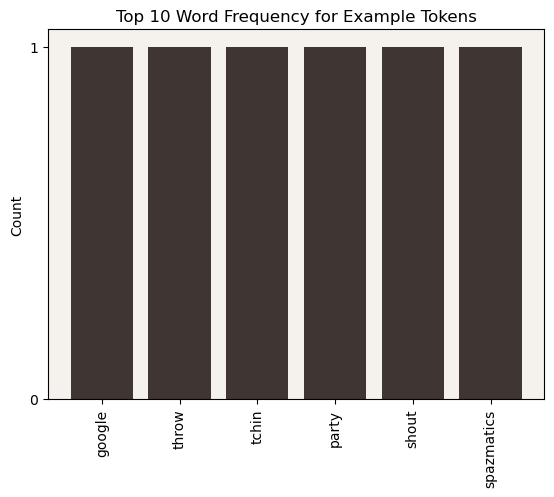

In [66]:
# Importing the relevant package for top number of words
from matplotlib.ticker import MaxNLocator

# Creating a function to visualize the top 10 words

def visualize_top_10(freq_dist, title):
#     extracting data for graph
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]
    
#     Setting up graph and plotting data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts, color='#3F3533')
    ax.set_facecolor('#F5F2EE')
#     Custominzing plot appearance 
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='x', rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

* **FreqDist on the Full DataSet**

In order to calculate the count of words, they need to be stored into a list. To do so, we will `explode` the dataset.  

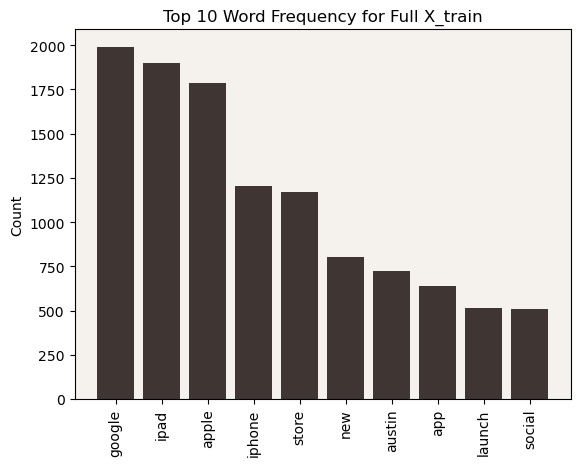

In [67]:
# Creating a frequency distribution for X_train
train_freq_dist = FreqDist(X_train['tweet'].explode())

# Plotting the top 10 tokens
visualize_top_10(train_freq_dist, 'Top 10 Word Frequency for Full X_train')


In [68]:
# Inspecting the most common 20 words
train_freq_dist.most_common(20)

[('google', 1990),
 ('ipad', 1897),
 ('apple', 1784),
 ('iphone', 1203),
 ('store', 1168),
 ('new', 804),
 ('austin', 721),
 ('app', 641),
 ('launch', 515),
 ('social', 509),
 ('circle', 508),
 ('pop', 459),
 ('android', 442),
 ('today', 433),
 ('ipad2', 361),
 ('network', 356),
 ('get', 343),
 ('via', 331),
 ('line', 325),
 ('party', 299)]

We will also subdivide this by category (positive/negative) to see if it makes a difference:

In [69]:
# Adding in labels for filtering
X_train['label'] = [y_train[val] for val in X_train.index]

In [70]:
# Defining customer colors
custom_colors = ['#3F3533', '#F5F2EE']

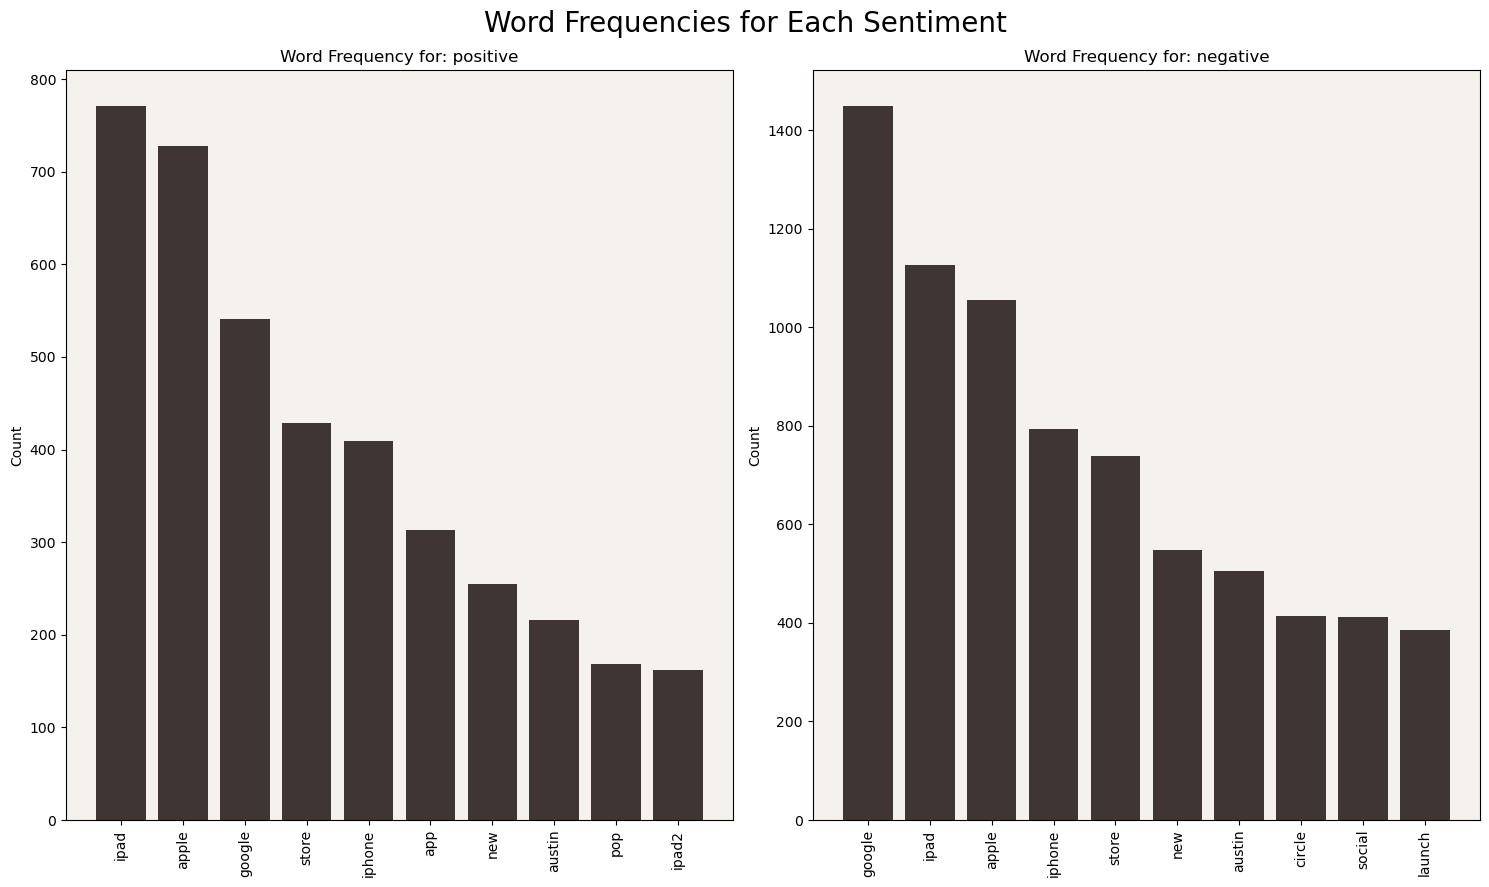

In [71]:
# Defining funcrion to plot 2 visualizations

# Creating two columns 
def two_subplits():
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(1, 2)
    
    ax1 = fig.add_subplot(gs[0, 0]) #row 0, col 0 
    ax2 = fig.add_subplot(gs[0, 1]) #row 0, col 1 
    return fig, [ax1, ax2]

# Plotting the graph
def plot_distribution_by_sentiment(X_version, column, axes, title = "Word Frequency for:"):
    for index, category in enumerate(X_version['label'].unique()): 
#         Calculating frequency distribution for this subset
        all_words = X_version[X_version['label'] == category][column].explode()
        freq_dist = FreqDist(all_words)
        top_10 = list(zip(*freq_dist.most_common(10)))
        tokens = top_10[0]
        counts = top_10[1]
        
        
#         Setting up a plot
        ax = axes[index]
        ax.bar(tokens, counts, color='#3F3533')
        
#         Setting background color
        ax.set_facecolor('#F5F2EE')
    
#         Customizing plot appearance
        ax.set_title(f"{title} {category}")
        ax.set_ylabel("Count")
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.tick_params(axis='x', rotation=90)
 
         
fig, axes = two_subplits()
plot_distribution_by_sentiment(X_train, 'tweet', axes)
fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
plt.show()

In [72]:
# Frequency distribution
# Defining subset prior. Here: positive, negative, no company tweets

negative_tweets = X_train[X_train['label'] == 'negative']
positive_tweets = X_train[X_train['label'] == 'positive']
no_product_or_company = X_train[X_train['product_or_company'] == 'undefined']

def freq_distr(subset, most_common):
    exploded_subset = subset['tweet'].explode()
    subset_freq = FreqDist(exploded_subset)
    return subset_freq.most_common(most_common)



In [73]:
# Getting frequency distribution for top 20 strings of no_product_or_company
freq_distr(no_product_or_company, 20)

[('google', 1392),
 ('ipad', 1034),
 ('apple', 1001),
 ('store', 733),
 ('iphone', 719),
 ('new', 550),
 ('austin', 504),
 ('social', 404),
 ('circle', 402),
 ('launch', 381),
 ('today', 334),
 ('app', 311),
 ('android', 291),
 ('pop', 286),
 ('network', 279),
 ('via', 236),
 ('called', 223),
 ('line', 209),
 ('free', 207),
 ('ipad2', 203)]

### 4: 2- g) WordCloud

We will now visually represent the most frequently mentioned words, without representing them in a bar graph. 
<br>Word clouds visually represent the frequency of words in a given text, with more frequently occurring words displayed in larger font size. This allows a quick and intuitive overview of the words occuring most.

In [74]:
# Installing wordcloud
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host=files.pythonhosted.org wordcloud

In [75]:
# Importing relevant packages
from matplotlib.colors import LinearSegmentedColormap

# Defining a colormap that interpolates between the two defined colors
custom_colors = ['#3F3533', '#F5F2EE']

n_bins = 5 

# Creating the custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=n_bins)

In [76]:
# Importing relevant packages 
from wordcloud import WordCloud

# Concatenate all tweets into a single string
all_tweets = ' '.join(X_train['tweet'].apply(lambda x: ' '.join(map(str, x))))

# Defining the function to plot wordclouds
def wordcloud_graph(text):
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='#F5F2EE', colormap=custom_cmap).generate(all_tweets)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


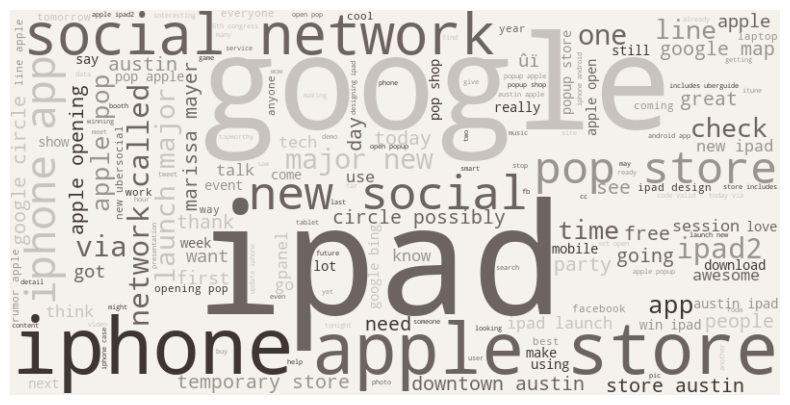

In [77]:
# Calling the function on all tweets
wordcloud_graph(all_tweets)

In [78]:
# This cell only is used for the purpose of searching words through the tweets 
word_researched = 'quot'
filtered_on_word = X_train[X_train['tweet'].apply(lambda tweet_list: any(word_researched in s for s in tweet_list))]
# filtered_on_word

Whether it comes from the frequency distribution or word cloud, the product and companies are the words that come up the most. 64% of the data does not contain any company or product. We will try filtering on this one to understand if the top words are different.  

In [79]:
# Verifying the count of rows by unique value in this column
df['product_or_company'].value_counts(normalize=True)

undefined                          0.638148
iPad                               0.104190
Apple                              0.072657
iPad or iPhone App                 0.051709
Google                             0.047189
iPhone                             0.032635
Other Google product or service    0.032304
Android App                        0.008820
Android                            0.008490
Other Apple product or service     0.003859
Name: product_or_company, dtype: float64

* **No company**

Let's inspect the dataframe filtered only on the ones where no product or company was included to review if there are any distinctions in the most frequent words. 

In [80]:
# Creating a DataFrame for undefined product or company
no_company = X_train[X_train['product_or_company'] == 'undefined']

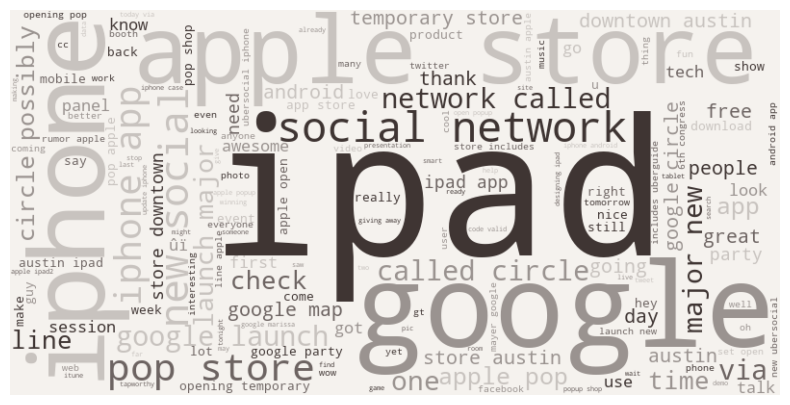

In [81]:
# Concatenating all tweets into a single string
no_company_tweets = ' '.join(no_company['tweet'].apply(lambda x: ' '.join(map(str, x))))

# Drawing the wordcloud on the list including only 'undefined' companies or products
wordcloud_graph(no_company_tweets)

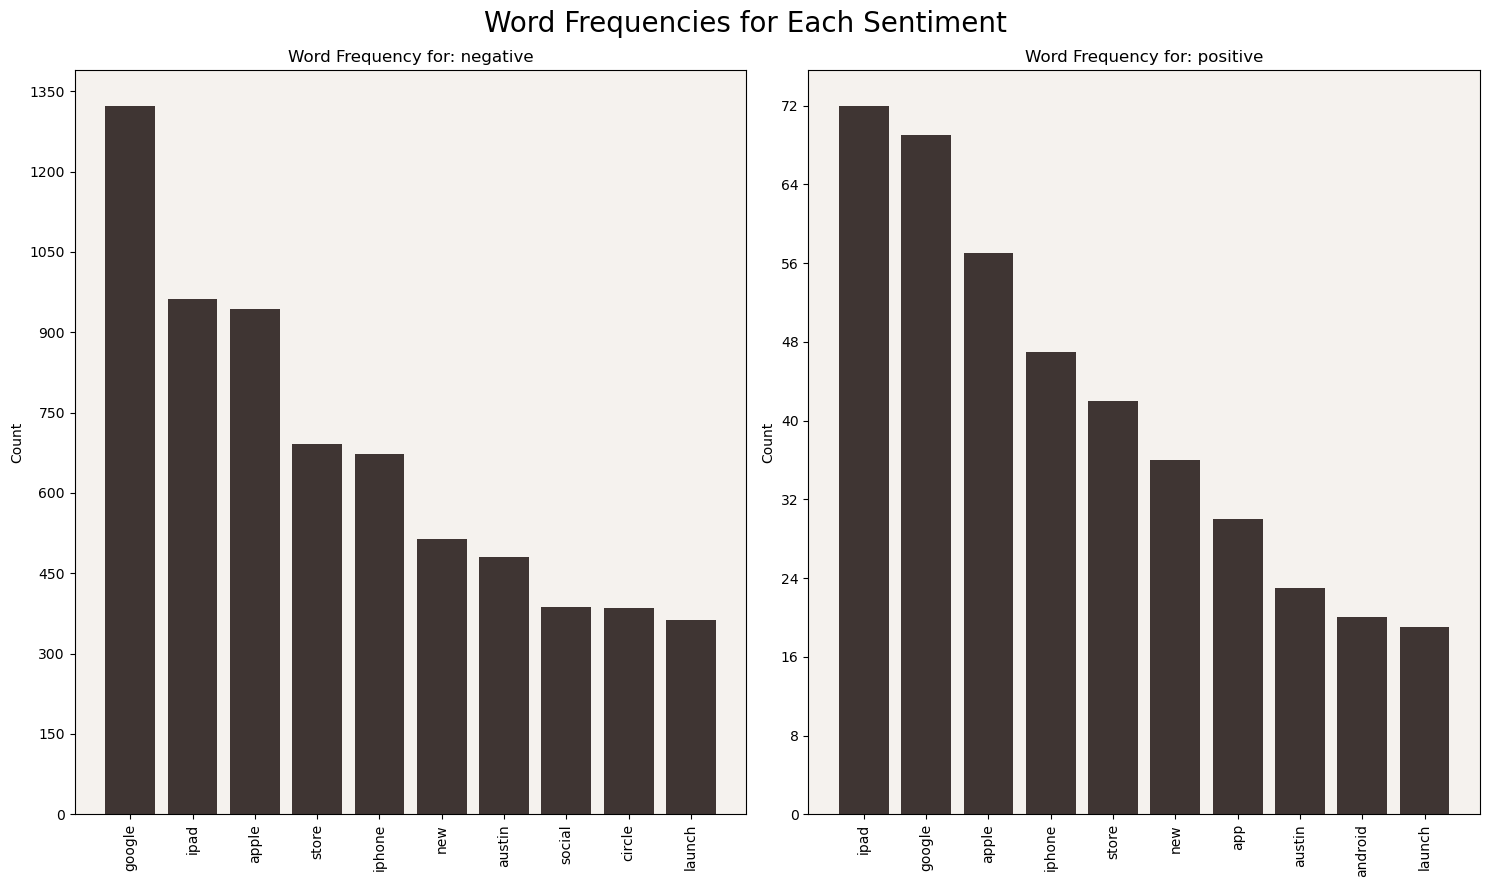

In [82]:
# Plotting the frequency for each sentiment - only of 'undefined' products or companies 
fig, axes = two_subplits()
plot_distribution_by_sentiment(no_company, 'tweet', axes)
fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
plt.show()

* **Company only**

For curiosity, let's inspect the dataframe filtered only on the ones where a product or company was included. 

In [83]:
# Creating a DataFrame for only product or company
company_only = X_train[X_train['product_or_company'] != 'undefined']

In [84]:
# Inspecting company_only DataFrame
company_only.head()

,tweet,product_or_company,tweet_original,tokenized_tweet,label
8268,"[huge, shout, gsdm, google, kick, as, party, tonight, unbelievable, time]",Google,Huge shout out to GSDM &amp; Google for the kick ass party tonight! We had an unbelievable time. #SXSW,huge shout gsdm google kick as party tonight unbelievable time,positive
7771,"[awesome, yes, gowalla, win, best, andoid, app, team, android, choice, award, thanks]",Android App,Awesome! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw,awesome yes gowalla win best andoid app team android choice award thanks,positive
1643,"[justmet, worked, apple, 25, year]",Apple,#justmet @mention who worked for Apple for 25 years! #SXSW,justmet worked apple 25 year,positive
6986,"[yes, updated, iphone, app, song, info, 24, stream, others, also, live, video, streaming]",iPad or iPhone App,RT @mention YES! updated iPhone app has song info @mention 24/7 stream +others also live video streaming for #SXSW {link},yes updated iphone app song info 24 stream others also live video streaming,positive
9029,"[top, story, apple, school, marketing, expert, thousand, town, demonstrate, social, mar]",Apple,"[TOP STORY] At #SXSW, Apple schools the marketing experts: Thousands in town to demonstrate their social mar... {link} #sxswi",top story apple school marketing expert thousand town demonstrate social mar,positive


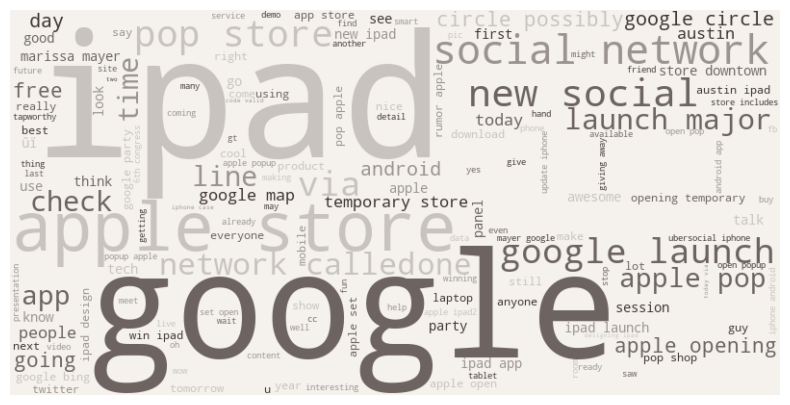

In [85]:
# Concatenating all tweets into a single string
company_tweets = ' '.join(no_company['tweet'].apply(lambda x: ' '.join(map(str, x))))

wordcloud_graph(company_tweets)

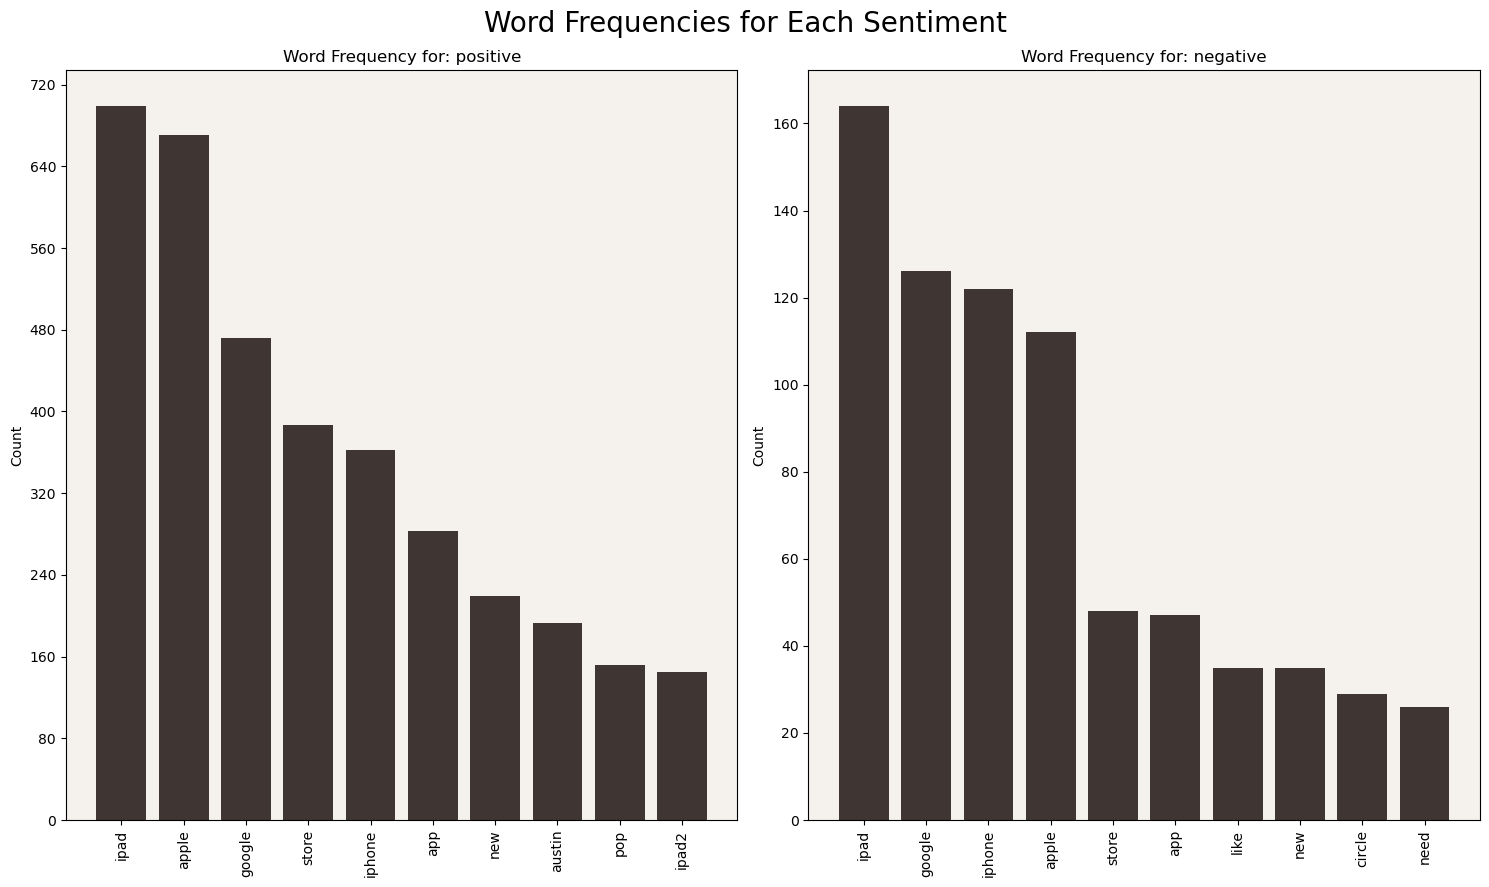

In [86]:
# Calling the function to plot frequency by sentiment
fig, axes = two_subplits()
plot_distribution_by_sentiment(company_only, 'tweet', axes)
fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
plt.show()

* **No company words**

Filtering on the 'undefined' product or company still included a lot of company tokens. We will try to remove them manually. 

In [87]:
# Defining list of product or company name to remove
list_of_company_products = ['google', 'android', 'apple', 'ipad', 'iphone', 'ipad2']
# Making a copy of the dataframe to first evaluate
no_product_company = X_train.copy()

In [88]:
# Removing any word corresponding to product or company
no_product_company['tweet'] = no_product_company['tweet'].apply(
    lambda tweet_list: [word for word in tweet_list if word.lower() not in list_of_company_products]
)

In [89]:
# Verifying if words were removed at first glance
no_product_company.head()

,tweet,product_or_company,tweet_original,tokenized_tweet,label
8268,"[huge, shout, gsdm, kick, as, party, tonight, unbelievable, time]",Google,Huge shout out to GSDM &amp; Google for the kick ass party tonight! We had an unbelievable time. #SXSW,huge shout gsdm google kick as party tonight unbelievable time,positive
945,"[20, search, local, information, marissa, mayer, million, place, claimed, owner, logged]",undefined,#SXSW 20% of Google searches are for local information: Marissa Mayer. 6 million places claimed by their owners and logged by #Google,20 google search local information marissa mayer million place claimed owner logged google,negative
8832,"[free, playlist, enjoy]",undefined,free #sxsw playlist.. enjoy {link},free playlist enjoy,negative
7771,"[awesome, yes, gowalla, win, best, andoid, app, team, choice, award, thanks]",Android App,Awesome! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw,awesome yes gowalla win best andoid app team android choice award thanks,positive
1643,"[justmet, worked, 25, year]",Apple,#justmet @mention who worked for Apple for 25 years! #SXSW,justmet worked apple 25 year,positive


In [90]:
# Researching the tweets which refer to ipad
word_researched = 'ipad'
filtered_on_word = no_product_company[no_product_company['tweet'].apply(lambda tweet_list: any(word_researched in s for s in tweet_list))]

In [91]:
# Calling new dataframe filtered on word
filtered_on_word.head()

,tweet,product_or_company,tweet_original,tokenized_tweet,label
279,"[technews, opening, pop, store, austin, geekfest, tech_news, brian_lam, ipad_2, tech]",undefined,#technews Apple Opening Pop-Up Store in Austin for SXSW Geekfest [Apple] {link} #Tech_News #Apple #Brian_Lam #iPad_2 #SXSW #tech,technews apple opening pop store austin geekfest apple tech_news apple brian_lam ipad_2 tech,negative
8363,"[hate, fleet, nerd, armed, ipads, navigating, crowd, far, cool, ever, seen]",iPad,"Not to hate on the iPad, but fleets of nerds armed with iPads navigating through crowds is as far from cool as I've EVER seen #sxsw",hate ipad fleet nerd armed ipads navigating crowd far cool ever seen,negative
5541,"[bad, news, update, pop, store, ipads, sure, tomorrow]",undefined,RT @mention Bad news update: the pop-up Apple Store is out of iPads! Not sure if they will have more by tomorrow. #SXSW,bad news update pop apple store ipads sure tomorrow,negative
6696,"[surprise, opened, pop, store, austin, nerd, town, get, new, ipads, cnet]",undefined,RT @mention Surprise! Apple opened a pop-up store in Austin so that the nerds in town for #SXSW can get new iPads. {link} #cnet,surprise apple opened pop store austin nerd town get new ipads cnet,negative
4103,"[picked, great, venue, launch, new, ipads]",Apple,#SXSW Apple picked a great venue to launch the new Ipads.,apple picked great venue launch new ipads,positive


In [92]:
# Concatenating all tweets into a single string
no_prod_comp_list = ' '.join(no_product_company['tweet'].apply(lambda x: ' '.join(map(str, x))))

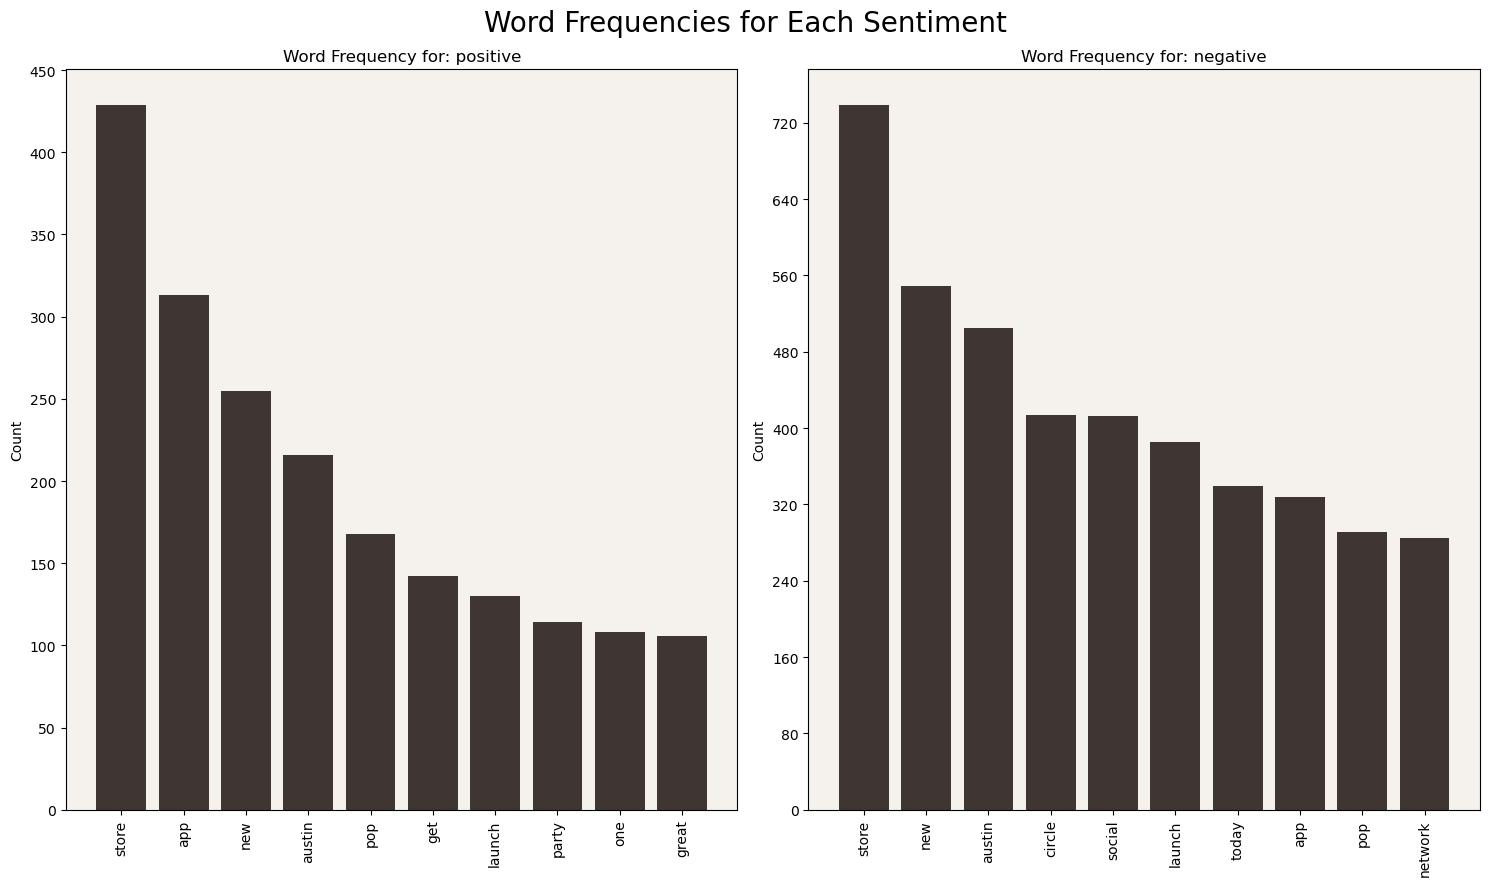

In [93]:
# Viewing the frequencies for each sentiment
fig, axes = two_subplits()
plot_distribution_by_sentiment(no_product_company, 'tweet', axes)
fig.suptitle('Word Frequencies for Each Sentiment', fontsize=20)
 # Saving the plot as a PNG with a transparent background
plt.savefig('images/freq_by_sentiment.png', transparent=True)
plt.show()

In [94]:
# Getting frequency for no_prod_company_tweets
# no_product_company 
positive_tweets_no_comp = no_product_company[no_product_company['label'] == 'positive']
negative_tweets_no_comp = no_product_company[no_product_company['label'] == 'negative']

In [95]:
# Viewing the frequency of words without a plot: no product or company
freq_distr(no_product_company, 20)

[('store', 1168),
 ('new', 804),
 ('austin', 721),
 ('app', 641),
 ('launch', 515),
 ('social', 509),
 ('circle', 508),
 ('pop', 459),
 ('today', 433),
 ('network', 356),
 ('get', 343),
 ('via', 331),
 ('line', 325),
 ('party', 299),
 ('free', 284),
 ('called', 269),
 ('mobile', 263),
 ('one', 243),
 ('time', 227),
 ('major', 223)]

In [96]:
# Viewing the frequency of words without a plot: positive tweets only for no company or product
freq_distr(positive_tweets_no_comp, 20)

[('store', 429),
 ('app', 313),
 ('new', 255),
 ('austin', 216),
 ('pop', 168),
 ('get', 142),
 ('launch', 130),
 ('party', 114),
 ('one', 108),
 ('great', 106),
 ('line', 103),
 ('time', 101),
 ('social', 96),
 ('via', 95),
 ('circle', 94),
 ('today', 94),
 ('win', 93),
 ('map', 90),
 ('day', 90),
 ('cool', 89)]

In [97]:
# Viewing the frequency of words without a plot: negative tweets only for no company or product
freq_distr(negative_tweets_no_comp, 20)

[('store', 739),
 ('new', 549),
 ('austin', 505),
 ('circle', 414),
 ('social', 413),
 ('launch', 385),
 ('today', 339),
 ('app', 328),
 ('pop', 291),
 ('network', 285),
 ('via', 236),
 ('called', 222),
 ('line', 222),
 ('get', 201),
 ('free', 195),
 ('mobile', 187),
 ('party', 185),
 ('major', 180),
 ('possibly', 146),
 ('temporary', 139)]

Having filtered on no company tweets give us a better idea.

Positive tweets talk about...
<br>negative tweets talk about ... 

Let's review bigrams to get a better understanding. 

### 4: 2- h) Bigrams

#### Bigrams

* **All tweets**

In [98]:
# Importing relevant package
from nltk.collocations import *

# Storing nltk.collocations.BigramAssocMeasures into variable
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [99]:
# Defining a function to review bigrams
def bigram_review(text, top_n):
    # Creating a finder and passing it the words of tweets summarized as 1 list  
    text_finder = BigramCollocationFinder.from_words(text.sum())
    text_scored = text_finder.score_ngrams(bigram_measures.raw_freq)
    return text_scored[: top_n]


In [100]:
# Calling the function to review the top 20 bigrams 
bigram_review(no_product_company['tweet'], 20)

[(('pop', 'store'), 0.006248214795772636),
 (('social', 'network'), 0.006105398457583547),
 (('new', 'social'), 0.005551985147100829),
 (('called', 'circle'), 0.004480862610682662),
 (('network', 'called'), 0.004302342187946301),
 (('major', 'new'), 0.0038381890888317624),
 (('launch', 'major'), 0.0036953727506426736),
 (('temporary', 'store'), 0.0033204798628963155),
 (('circle', 'possibly'), 0.003124107397886318),
 (('possibly', 'today'), 0.003088403313339046),
 (('store', 'austin'), 0.002767066552413596),
 (('downtown', 'austin'), 0.0025528420451299627),
 (('marissa', 'mayer'), 0.002356469580119966),
 (('store', 'downtown'), 0.0023029134532990573),
 (('popup', 'store'), 0.002070836903741788),
 (('opening', 'temporary'), 0.001570979720079977),
 (('austin', 'launch'), 0.0014817195087117967),
 (('app', 'store'), 0.001356755212796344),
 (('pop', 'shop'), 0.0011246786632390746),
 (('opening', 'pop'), 0.0010532704941445302)]

We saw earlier that the tweets containing company names or products indicated too many of of these strings, and were not relevant for us. We will straight away separate positive and negative tweets from the dataset that contains no product or company information. 

In [101]:
# They were declared before
# positive_tweets_no_comp = no_product_company[no_product_company['label'] == 'positive']
# negative_tweets_no_comp = no_product_company[no_product_company['label'] == 'negative']

* **Positive Tweets**

In [102]:
# Calling the function to review the top 20 bigrams for positive tweets only
bigram_review(positive_tweets_no_comp['tweet'], 20)

[(('pop', 'store'), 0.0068745263613727405),
 (('social', 'network'), 0.0035725885027606367),
 (('temporary', 'store'), 0.00319367760095269),
 (('new', 'social'), 0.003139547472122984),
 (('downtown', 'austin'), 0.002923026956804157),
 (('store', 'downtown'), 0.0027606365703150373),
 (('marissa', 'mayer'), 0.0024899859261665043),
 (('called', 'circle'), 0.0024358557973367975),
 (('network', 'called'), 0.002381725668507091),
 (('popup', 'store'), 0.002381725668507091),
 (('launch', 'major'), 0.0021652051531882645),
 (('major', 'new'), 0.0021652051531882645),
 (('store', 'austin'), 0.0021652051531882645),
 (('opening', 'temporary'), 0.0017321641225506116),
 (('circle', 'possibly'), 0.001678033993720905),
 (('possibly', 'today'), 0.001678033993720905),
 (('even', 'begin'), 0.001569773736061492),
 (('austin', 'launch'), 0.0014615134784020786),
 (('come', 'cool'), 0.0014615134784020786),
 (('go', 'conference'), 0.001407383349572372)]

1. There is enthusiasm around the new pop up store created. 
<br>In addition, the fact these are temporary locations create even more envy to be there first. 
<br>This indicates that: for the launch of the folding tablet, exclusive access to SXSW attendees should be organized to create craze around the new product.  

2. The new social network "Circle" created created a lot of curiosity as well. 
<br>We would not recommend creating a social network nowadays as the market is already mature in this area, but this can be used to know to create a specific hashtag associated with a game to win the new folding tablet. 

3. The speech Marissa Mayer gave was very well received. <br>Organizing a speech for this year by a respected leader in the technology market would be recommended as well.   

* **Negative Tweets**

In [103]:
# Calling the function to review the top 20 bigrams for negative tweets only
bigram_review(negative_tweets_no_comp['tweet'], 20)

[(('social', 'network'), 0.007351766022055298),
 (('new', 'social'), 0.00673911885355069),
 (('pop', 'store'), 0.005940013851153375),
 (('called', 'circle'), 0.0054871876831282295),
 (('network', 'called'), 0.005247456182409035),
 (('major', 'new'), 0.004661445847317671),
 (('launch', 'major'), 0.0044483511800117205),
 (('circle', 'possibly'), 0.003835704011507112),
 (('possibly', 'today'), 0.0037824303446806246),
 (('temporary', 'store'), 0.003382877843481967),
 (('store', 'austin'), 0.003063235842523041),
 (('downtown', 'austin'), 0.0023706781737787013),
 (('marissa', 'mayer'), 0.00229076767353897),
 (('store', 'downtown'), 0.002077673006233019),
 (('popup', 'store'), 0.001917852005753556),
 (('austin', 'launch'), 0.0014916626711416548),
 (('opening', 'temporary'), 0.0014916626711416548),
 (('app', 'store'), 0.0013318416706621916),
 (('opening', 'pop'), 0.0010921101699429973),
 (('launch', 'new'), 0.0010654733365297534)]

### 4: 2- i) Mutual Information Scores

We will calculate mutual information scores and we will create a frequency filter, so that we only examine bigrams that occur more than a set number of times: here, 5. 

In [104]:
# Defining a function to calculate the mutual information scores
def mutual_info_score(text, n_filter):
    text_pmi_finder = BigramCollocationFinder.from_words(text.sum())
    text_pmi_finder.apply_freq_filter(n_filter)
    text_pmi_scored = text_pmi_finder.score_ngrams(bigram_measures.pmi)
    return text_pmi_scored

In [105]:
# Calling the function for the top 10 mutual information scores for all tweets
mutual_info_score(no_product_company['tweet'], 5)[:10]

[(('barton', 'hollow'), 13.451623251541143),
 (('mover', 'shaker'), 13.451623251541143),
 (('charles', 'chen'), 13.188588845707347),
 (('jc', 'penney'), 13.188588845707347),
 (('rww', 'f6bcet'), 13.188588845707347),
 (('entered', 'automatically'), 12.9661964243709),
 (('hobo', 'shotgun'), 12.9661964243709),
 (('khoi', 'vinh'), 12.9661964243709),
 (('98', 'accuracy'), 12.773551346428505),
 (('cameron', 'sinclair'), 12.773551346428505)]

In [106]:
# Calling the function for the top 10 mutual information scores for positive tweets
mutual_info_score(positive_tweets_no_comp['tweet'], 5)[:10]

[(('league', 'extraordinary'), 11.851280557878614),
 (('lustre', 'pearl'), 11.851280557878614),
 (('security', 'guard'), 11.588246152044817),
 (('south', 'southwest'), 11.36585373070837),
 (('speech', 'therapy'), 11.36585373070837),
 (('150', 'million'), 11.173208652765974),
 (('maggie', 'mae'), 11.173208652765974),
 (('belinsky', '911tweets'), 10.980563574823577),
 (('mark', 'belinsky'), 10.980563574823577),
 (('awesomely', 'rad'), 10.85128055787861)]

In [107]:
# Calling the function for the top 10 mutual information scores for negative tweets
mutual_info_score(negative_tweets_no_comp['tweet'], 5)[:10]

[(('acoustic', 'solo'), 12.611255388699337),
 (('charles', 'chen'), 12.611255388699337),
 (('entered', 'automatically'), 12.611255388699337),
 (('jc', 'penney'), 12.611255388699337),
 (('khoi', 'vinh'), 12.611255388699337),
 (('rww', 'f6bcet'), 12.611255388699337),
 (('98', 'accuracy'), 12.38886296736289),
 (('galaxy', 'ii'), 12.38886296736289),
 (('lustre', 'pearl'), 12.38886296736289),
 (('cameron', 'sinclair'), 12.196217889420495)]

The mutual information scores inform us that several speakers were present, and that concerts are often talked about at SXSW.
* Barton Hollow did a live at the conference
* JC Penney CEO and made a speech at the conference
* Co-Founder and TED prize winner Cameron Sinclair was present as well 


On the positive side: music events create buzz. 
* League of Extraordinary G'z were really well received
* Security at the events is appreciated 
* The launch of galaxy ii was already talked about often, and with positive sentiments associated 


<a id='modeling'></a>

## 5. Modeling

We now have an initial idea for recommendations for the marketing strategy. Our objective is now to:
1. Provide more precise recommendations
2. Develop a tool to measure the tweets' sentiments, once the strategy is deployed

Because it is important to measure both sentiments: whether they are positive, or negative, the evaluation metrics we will focus on will be accuracy and F1. 
<br>In addition, the dataset is highly imbalanced: 67% of tweets are not positive. This is natural to have more reviews around negative than positives and we expect new unseen data to have similar distributions.  
<br>Accuracy score by itself might be misleading, while F1 considers both false positives and false negatives. 

As the dataset is a text, it requires a transformation before it can be used for modeling. Like other types of dataset would one-hot encoded, here, the tweets were vectorized, using the common method in natural language processing: `TfidfVectorizer`.  
<br> It converts a collection of text documents to a matrix of tf-idf features. 

* Term-Frequency
<br>Measures how often a term (word) appears in a document
* Inverse Document Frequency (IDF)
<br>Measures the importance of a term in the entire collection of documents. 

4 main classification models were explored: 
1. Multinomial Naive Bayes
2. Decision Tree
3. Random Forest 
4. K-Nearest Neighbor 

The models' parameters were tuned using the following approaches:
1. Under Sampling
2. Hyperparameter Tuning
    * Combinatoric Grid Searching



In [108]:
# Reminding the natural balance
y_train.value_counts(normalize=True)

negative    0.672596
positive    0.327404
Name: sentiment, dtype: float64

By using only the dataset's natural class balance, and if we guessed the contribution of the majority class every time we would get 67% accuracy. However, if we were to guess that a tweet was positive, we would expect only about 33% accuracy. 

### 5. a) Baseline Model with TfidfVectorizer and MultinomialNB

The first baseline model will vectorize the tweets and make predictions using Multinomial Naive Bayes. The first step is to import the vectorizer, instantiate a vectorizer object and fit it on `X_train['tweet']`.

### <u>1st iteration</u>: Tfidf Vectorizer with Pipeline 

    1) Fitting and training on train data

In [109]:
# Importing the relevant packages
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline steps
tfidf_vectorizer = TfidfVectorizer(max_features=10)
naive_bayes_classifier = MultinomialNB()

# Create the pipeline
base_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', naive_bayes_classifier)
])

# Fitting the pipeline on X_train['tweet_original'] and y_train
base_pipeline.fit(X_train['tweet_original'], y_train)

# Calculating predictions using this model
base_y_pred = base_pipeline.predict(X_test['tweet_original'])

# Optionally, you can access the individual components of the pipeline:
X_train_vectorized = base_pipeline.named_steps['tfidf'].transform(X_train['tweet_original'])
baseline_model = base_pipeline.named_steps['classifier']

    2) Evaluation Metrics

In [110]:
# Importing the relevant packages
from sklearn.metrics import precision_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

def evaluation_metrics(y_test, y_pred, model, X, y):
    with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
    
    # Calculating and printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Calculating and printing F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'F1-Score: {f1:.4f}')
    
    # Calculating and printing precision
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f'Precision: {precision:.4f}')

    # Performing cross-validation and printing the mean accuracy
    cv_scores = cross_val_score(model, X, y, cv=5)
    mean_cv_accuracy = cv_scores.mean()
    print(f'Mean Cross-Validated Accuracy: {mean_cv_accuracy:.4f}')
    
    return accuracy, f1, precision, mean_cv_accuracy

In [111]:
# Naming the model and calling the function to evaluate it
baseline_model_name = 'Baseline'

# Calling the function and recording into the defined values
accuracy_base, precision_base, f1_base, cv_base = evaluation_metrics(
    y_test, 
    base_y_pred, 
    base_pipeline, 
    X_train['tweet_original'], 
    y_train)

Accuracy: 0.6724
F1-Score: 0.5407
Precision: 0.4521
Mean Cross-Validated Accuracy: 0.6726


    3) Classification Report

In [112]:
# Defining a function to print a classification report

import warnings
from sklearn.metrics import classification_report

def class_calculation(y_test, y_pred):
    # y_preds will be calculated for each model beforehand 
    
    # Generating and printing classification report
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
    class_report = classification_report(y_test, y_pred, zero_division=0, digits=5)
    
    # Due to class imbalance, the initial precision for positive returns 0 
    # Consequently, warnings need to be handled 
    print('Classification Report:\n', class_report)
    return class_report
    
    


In [113]:
# Calling the function to record the classification report
base_class_report = class_calculation(y_test, base_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.67240   1.00000   0.80411      1525
    positive    0.00000   0.00000   0.00000       743

    accuracy                        0.67240      2268
   macro avg    0.33620   0.50000   0.40206      2268
weighted avg    0.45212   0.67240   0.54068      2268



    4) Confusion Matrix

In [114]:
# Importing relevant packages
from matplotlib.colors import LinearSegmentedColormap

# Defining a colormap that interpolates between the two defined colors
custom_colors_cnf = ['#3F3533', '#F5F2EE']

n_bins = 20 

# Creating the custom colormap
custom_cmap_cnf = LinearSegmentedColormap.from_list("custom_cmap", custom_colors_cnf, N=n_bins)

In [115]:
# Displaying visually the confusion matrix 

# Importing the relevant package 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_matrix_display(model, y_test, y_pred):
    # Defining the confusion matrix 
    cnf_matrix = confusion_matrix(y_test, y_pred)
#     print(cnf_matrix)
    
    # Normalizing the confusion matrix
    cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_normalized, display_labels=model.classes_)

    disp.plot(cmap=custom_cmap_cnf)

    plt.title("Model Performance: Confusion Matrix", fontsize=16)

    # Saving the plot as a PNG with a transparent background
    plt.savefig('images/confusion_matrix.png', transparent=True)

    return cnf_matrix
    plt.show()
    

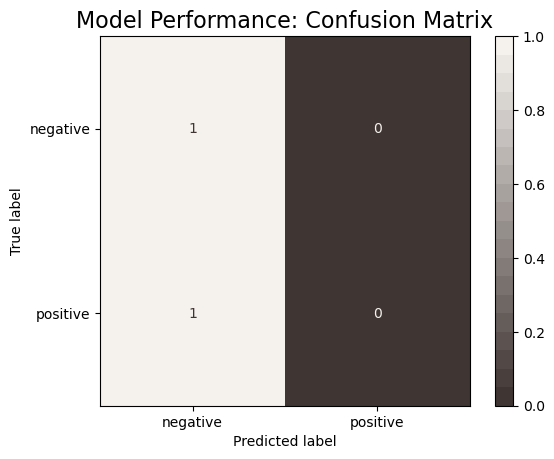

In [116]:
# Calling the function to display the confusion matrix 
base_cfn_matrix = confusion_matrix_display(base_pipeline, y_test, base_y_pred)

### <u>2nd iteration</u>: Addressing class imbalance: undersampling negative tweets

The model does not have enough data for positive tweets, comparatively to negative ones. 

As a consequence, the dataset needs to be resampled. More precisely, negative tweets need to be undersampled.

    1) Fitting and training on train data

In [117]:
# Importing relevant packages
from imblearn.under_sampling import RandomUnderSampler
import imblearn.pipeline

Now that we have preprocessed data, we will fit and evaluate the baseline model on the newly resampled data.

In [118]:
# Defining the pipeline steps
tfidf_vectorizer = TfidfVectorizer(max_features=10)
naive_bayes_classifier = MultinomialNB()

# Including the UnderSampler to the pipeline
rs_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', naive_bayes_classifier)
])

# Fitting the pipeline on X_train['tweet_original'] and y_train
rs_pipeline.fit(X_train['tweet_original'], y_train)

rs_y_pred = rs_pipeline.predict(X_test['tweet_original']) 


In [119]:
# Verifying the value counts of each category, before undersampling
original_value_counts = y_train.value_counts()
print("Original class distribution:")
print(original_value_counts)

# Getting the indices of the resampled data
resampled_indices = rs_pipeline.named_steps['us'].sample_indices_

# Verifying the new value counts of each category, after undersampling
resampled_value_counts = y_train.iloc[resampled_indices].value_counts()
print("\nClass distribution after undersampling:")
print(resampled_value_counts)


Original class distribution:
negative    4575
positive    2227
Name: sentiment, dtype: int64

Class distribution after undersampling:
negative    2227
positive    2227
Name: sentiment, dtype: int64


    2) Evaluation Metrics

In [120]:
# Naming the model
resampled_model_name = 'Resampled'

# Calling the function and recording into the defined values
accuracy_rs, f1_rs, precision_rs, cv_rs = evaluation_metrics(
    y_test, 
    rs_y_pred, 
    rs_pipeline, 
    X_train['tweet_original'], 
    y_train)

Accuracy: 0.5692
F1-Score: 0.5806
Precision: 0.6030
Mean Cross-Validated Accuracy: 0.5706


The accuracy score drastically decreased, but we now have a precision and f1 scores, indicating the 'positive sentiments' are now correctly represented.  

    3) Classification Report

In [121]:
resamp_class_report = class_calculation(y_test, rs_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.71175   0.60393   0.65342      1525
    positive    0.37988   0.49798   0.43098       743

    accuracy                        0.56922      2268
   macro avg    0.54581   0.55096   0.54220      2268
weighted avg    0.60303   0.56922   0.58055      2268



    4) Confusion Matrix

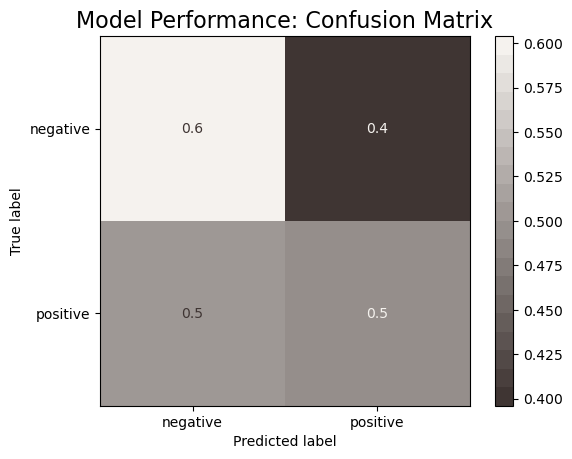

In [122]:
rs_cfn_matrix = confusion_matrix_display(rs_pipeline, y_test, rs_y_pred)

### <u>3rd iteration</u>: including stopwords

We will now test fitting the vectorizer by removing the stopwords from tweets to review if this can help predictions be more accurate.

    1) Fitting and training train data

In [123]:
# Defining the pipeline steps, including the stopwords_list created 
tfidf_vectorizer = TfidfVectorizer(max_features=10, stop_words=stopwords_list)
naive_bayes_classifier = MultinomialNB()

# Instantiating the pipeline with the undersampler and the new vectorizer
pipeline_nostop = imblearn.pipeline.Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', naive_bayes_classifier)
])

# Fit the pipeline on X_train['tweet_original'] and y_train
pipeline_nostop.fit(X_train['tweet_original'], y_train)

# Generating predictions
nostop_y_pred = pipeline_nostop.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [124]:
# Naming the model
nostop_model_name = 'No Stopwords'

# Calling the function and recording into the defined values
accuracy_nostop, f1_nostop, precision_nostop, cv_nostop = evaluation_metrics(
    y_test, 
    nostop_y_pred, 
    pipeline_nostop, 
    X_train['tweet_original'], 
    y_train)

Accuracy: 0.5992
F1-Score: 0.6067
Precision: 0.6183
Mean Cross-Validated Accuracy: 0.6036


The accuracy score now increased slightly, however it remains below just guessing the majority class.

    3) Classification Report

In [125]:
# Calling the classification function
nostop_class_report = class_calculation(y_test, nostop_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.72190   0.65705   0.68795      1525
    positive    0.40568   0.48048   0.43993       743

    accuracy                        0.59921      2268
   macro avg    0.56379   0.56877   0.56394      2268
weighted avg    0.61831   0.59921   0.60670      2268



    4) Confusion Matrix

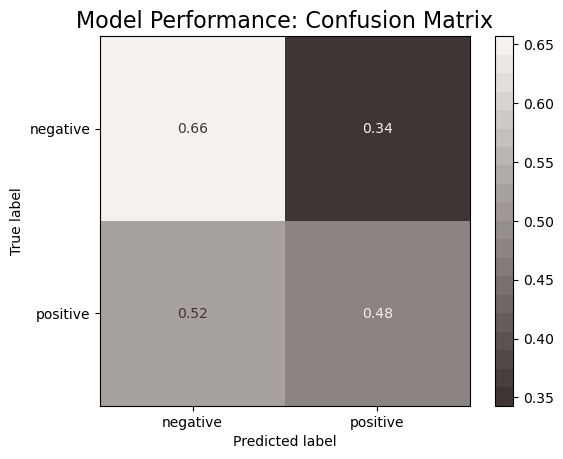

In [126]:
# Calling the confusion matrix function
nostop_cfn_matrix = confusion_matrix_display(pipeline_nostop, y_test, nostop_y_pred)

### <u>4th iteration</u>: Applying the full preprocessing to tweets

    1) Fitting and training train data

In [127]:
# Not applying stopwords to the vectorizer, as they were applied to the preprocessed tweets.

In [128]:
# Defining the pipeline steps 
tfidf_vectorizer = TfidfVectorizer(max_features=10)
naive_bayes_classifier = MultinomialNB()

# Instantiating the pipeline with the undersampler and the new vectorizer
pipeline_prep = imblearn.pipeline.Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', naive_bayes_classifier)
])

# Fitting the pipeline on X_train['tokenized tweet'] which contains the preprocessed tweets
pipeline_prep.fit(X_train['tokenized_tweet'], y_train)

# Generating predictions
prep_y_pred = pipeline_prep.predict(X_test['tokenized_tweet'])

    2) Evaluation Metrics

In [129]:
preprocessed_model_name = 'Preprocessed'

# Calling the function and recording into the defined values
accuracy_pp, f1_pp, precision_pp, cv_pp = evaluation_metrics(
    y_test, 
    prep_y_pred, 
    pipeline_prep, 
    X_train['tokenized_tweet'], 
    y_train)

Accuracy: 0.5767
F1-Score: 0.5887
Precision: 0.6160
Mean Cross-Validated Accuracy: 0.5888


All scores decreased, when applying the model on the full tokenized tweets

    3) Classification Report

In [130]:
# Drawing the classification report 
prep_class_report = class_calculation(y_test, prep_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.72474   0.59738   0.65492      1525
    positive    0.39268   0.53432   0.45268       743

    accuracy                        0.57672      2268
   macro avg    0.55871   0.56585   0.55380      2268
weighted avg    0.61596   0.57672   0.58867      2268



    4) Confusion Matrix

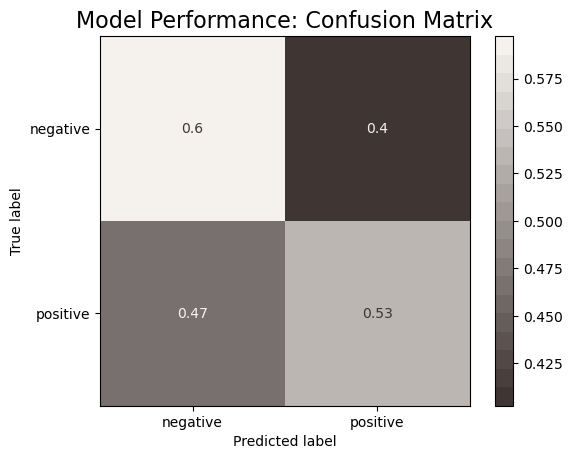

In [131]:
# Plotting the confusion matrix
prep_cnf_matrix = confusion_matrix_display(pipeline_prep, y_test, prep_y_pred)

### <u>5th iteration</u>: Tuning Tfidf Vectorizer - Hyperparameter tuning

The model performed better when stopwords were removed but worse when applied on the full tokenized tweets. Let's try to use combinatoric grid searching to find the best parameters for the vectorizer. 

    1) Fitting and training train data

In [132]:
from sklearn.model_selection import GridSearchCV

# Defining the pipeline steps, excluding any manual input of features, with the vectorizer and classifier
# The pipeline still includes the undersampler to ensure class imbalance
gs_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', MultinomialNB())
])

# Define the parameter grid to search over
parameters = {
    'tfidf__max_features': [10, 50, 100, None],
    'tfidf__max_df': [0.7, 0.8, 0.9],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    # including the list of stopwords that was defined earlier 
    'tfidf__stop_words': [None, 'english', stopwords_list],
}


In [133]:
# Performing grid search for hyperparameter tuning
grid_search = GridSearchCV(gs_pipeline, parameters, cv=5, scoring='accuracy', error_score='raise')

# Fitting the tuned pipeline on training data
grid_search.fit(X_train['tweet_original'], y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('us',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', MultinomialNB())]),
             param_grid={'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__max_features': [10, 50, 100, None],
                         'tfidf__min_df': [1, 2, 3],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tfidf__stop_words': [None, 'english',
                                               ['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
                                                'herself', 'it', "it's", 'its',
                                                'itself', ...]],
                         'tfidf__sublinear_tf': [True, False]},
             scoring='accuracy')

In [134]:
# Recording the best parameters and printing them
best_tfidf_params = grid_search.best_params_

# Recording the best estimator as the best_pipeline
best_pipeline = grid_search.best_estimator_

print("Best Parameters:", best_tfidf_params)


Best Parameters: {'tfidf__max_df': 0.7, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (2, 2), 'tfidf__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'ho

In [135]:
# Fitting the best pipeline on training data
best_pipeline.fit(X_train['tweet_original'], y_train)

# Fitting the best model on the full training data
best_gs_y_pred = best_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [136]:
# Naming the model
tuned_model_name = 'NaiveBayes'

# Calling the function and recording into the defined values
accuracy_gs, f1_gs, precision_gs, cv_gs = evaluation_metrics(
    y_test, 
    best_gs_y_pred, 
    best_pipeline, 
    X_train['tweet_original'], 
    y_train)

Accuracy: 0.6631
F1-Score: 0.6711
Precision: 0.6886
Mean Cross-Validated Accuracy: 0.6491


The classification metrics are starting to increase and are starting to show more stability, less disparity among one another.

    3) Classification Report

In [137]:
# Calling the classification report function
tuned_class_report = class_calculation(y_test, best_gs_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.78588   0.68590   0.73249      1525
    positive    0.48879   0.61642   0.54524       743

    accuracy                        0.66314      2268
   macro avg    0.63733   0.65116   0.63887      2268
weighted avg    0.68855   0.66314   0.67115      2268



    4) Confusion Matrix

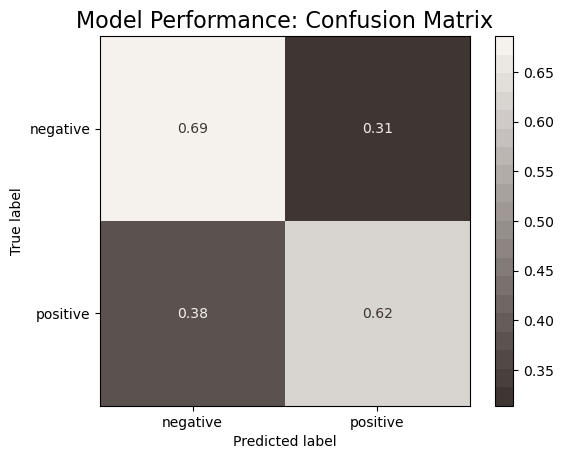

In [138]:
# Plotting the confusion matrix
gs_cfn_matrix = confusion_matrix_display(best_pipeline, y_test, best_gs_y_pred)

### 5. b) TfidfVectorizer and Decision Trees

### <u>6th iteration</u>: Decision Trees and Tfidf Vectorizer

Decision trees work well for understanding language because they are easy to interpret and handle the nuances in how words relate. They are good at understanding what words matter most and can deal with different types of word data without much difficulty. 

    1) Fitting and training train data

For higher computing performance, the best parameters recorded on the vectorizer with Multinomial Naive Bayes will be kept. Only the classifier will be modified. Let's see if, by using the best TF-IDF parameters with another classifier, we can improve further these predictions.

In [139]:
# Verifying the best vectorizer parameters 
print(best_tfidf_params)

{'tfidf__max_df': 0.7, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (2, 2), 'tfidf__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [140]:
# Creating a function that modifies the parameters, to allow them to be used for future classifiers
def transform_params(best_params):    
    new_best_params = {}
    for key, value in best_params.items():
        # Removing 'tfidf__' from the key
        new_key = key.replace('tfidf__', '')
        new_best_params[new_key] = value
    return new_best_params

In [141]:
# Calling the newly defined parameters 
new_best_tfidf_params = transform_params(best_tfidf_params)

# Inspecting them
print(new_best_tfidf_params)

{'max_df': 0.7, 'max_features': None, 'min_df': 1, 'ngram_range': (2, 2), 'stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'mo

In [142]:
# Importing the relevant packages
from sklearn.tree import DecisionTreeClassifier

# Defining the pipeline with new classifier, but the same best parameters
dt_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(**new_best_tfidf_params)),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

# Fitting the pipeline on training data
dt_pipeline.fit(X_train['tweet_original'], y_train)

# Making predictions on test data
dt_y_pred = dt_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [143]:
# Naming the model
dt_model_name = 'DecisionTree'


# Calling the function and recording into the defined values
accuracy_dt, f1_dt, precision_dt, cv_dt = evaluation_metrics(
    y_test,
    dt_y_pred,
    dt_pipeline,
    X_train['tweet_original'],
    y_train)
    

Accuracy: 0.6750
F1-Score: 0.6721
Precision: 0.6697
Mean Cross-Validated Accuracy: 0.6632


All scores slightly increased and remain consistent. Whether it is accuracy, F1, precision or the cross-validated accuracy, they are all in the 0.66 range as opposed to the previously recorded results. 
Cross-validated accuracy was in the 0.64 range, while precision was over 0.68.

    3) Classification Report

In [144]:
# Calling the classification report function
class_report_dt = class_calculation(y_test, dt_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.75032   0.77443   0.76218      1525
    positive    0.50432   0.47106   0.48713       743

    accuracy                        0.67504      2268
   macro avg    0.62732   0.62274   0.62465      2268
weighted avg    0.66973   0.67504   0.67207      2268



    4) Confusion Matrix

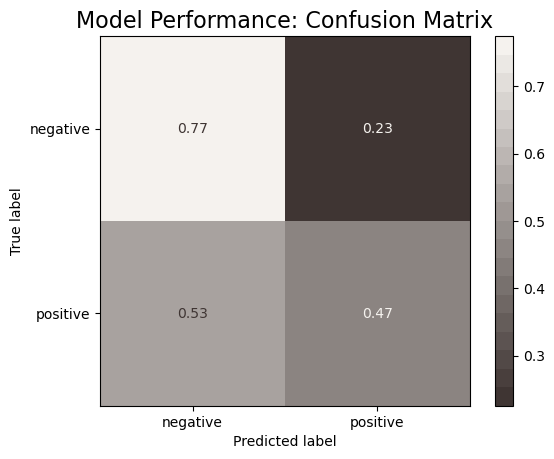

In [145]:
# Recording and displaying the confusion matrix
dt_cfn_matrix = confusion_matrix_display(dt_pipeline, y_test, dt_y_pred)

The model correctly identified 47% of positive tweets, but 77% of negative tweets. 

### 5. c) TfidfVectorizer and Random Forest 

### <u>7th iteration</u>: RandomForestClassifierTuning Tfidf Vectorizer

    1) Fitting and training on train data

Random Forest classifiers can be thought of as an extension of multiple decision trees working together together to understand language text.Let's see if, by using the best TFIDF parameters with another classifier, we can improve further these predictions.


In [146]:
# Importing the relevant package
from sklearn.ensemble import RandomForestClassifier

# Defining the pipeline with the fixed tfidf parameters and RandomForestClassifier
rf_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(**new_best_tfidf_params)),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier())
])

# Fitting the pipeline on training data
rf_pipeline.fit(X_train['tweet_original'], y_train)

# Making predictions on test data
rf_y_pred = rf_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [147]:
# Naming the model and calling the function to evaluate it
rf_tuned_model_name = 'RandomForest'


# Calling the function and recording into the defined values
accuracy_rf, f1_rf, precision_rf, cv_rf = evaluation_metrics(
    y_test,
    rf_y_pred,
    rf_pipeline,
    X_train['tweet_original'],
    y_train
)

Accuracy: 0.6918
F1-Score: 0.6796
Precision: 0.6760
Mean Cross-Validated Accuracy: 0.6861


The overall scores increased, recording the highest F1 Score reached. 
The model still has difficulty identifying positive tweets due to the dataset imbalance. 

    3) Classification Report

In [148]:
# Calling the classification report function
rf_class_report = class_calculation(y_test, rf_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.74294   0.82820   0.78326      1525
    positive    0.53873   0.41184   0.46682       743

    accuracy                        0.69180      2268
   macro avg    0.64084   0.62002   0.62504      2268
weighted avg    0.67604   0.69180   0.67959      2268



    4) Confusion Matrix

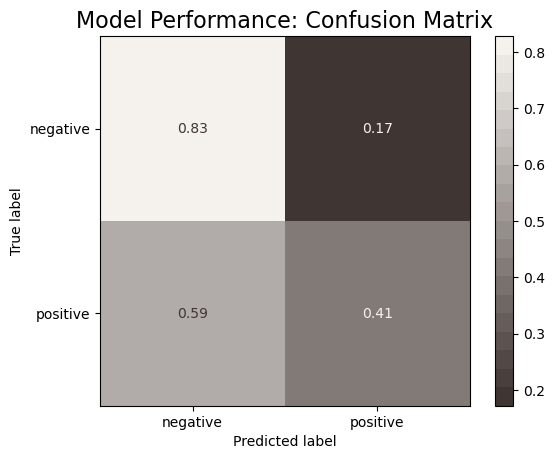

In [149]:
# Recording and displaying the confusion matrix
rf_confusion_matrix = confusion_matrix_display(rf_pipeline, y_test, rf_y_pred)

### 5. d) TfidfVectorizer and K-Nearest Neighbor

### <u>8th iteration</u>: K-Nearest Neighbor Tfidf Vectorizer

    1) Fitting and training on train data

The previous model was a bit computationally expensive. Let's see if the simpler K-Nearest Neighbor classifier would improve on that end. Nevertheless, kNN makes predictions based on what similar cases around it suggest so there is a risk it captures more noise created by the imbalanced dataset, despite the undersampled negative tweets.

In [150]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the pipeline with the fixed tfidf parameters and RandomForestClassifier
knn_pipeline = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(**new_best_tfidf_params)),
    ('us', RandomUnderSampler(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Fitting the pipeline on training data
knn_pipeline.fit(X_train['tweet_original'], y_train)

# Making predictions on test data
knn_y_pred = knn_pipeline.predict(X_test['tweet_original'])

    2) Evaluation Metrics

In [151]:
# Naming the model and calling the function to evaluate it
knn_tuned_model_name = 'kNN'


# Calling the function and recording into the defined values
accuracy_knn, precision_knn, f1_knn, cv_knn = evaluation_metrics(
    y_test,
    knn_y_pred,
    knn_pipeline,
    X_train['tweet_original'],
    y_train
)


Accuracy: 0.6839
F1-Score: 0.5890
Precision: 0.6703
Mean Cross-Validated Accuracy: 0.6813


    3) Classification Report

In [152]:
# Calling the function
knn_class_report = class_calculation(y_test, knn_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.68583   0.97770   0.80616      1525
    positive    0.63830   0.08075   0.14337       743

    accuracy                        0.68386      2268
   macro avg    0.66207   0.52923   0.47477      2268
weighted avg    0.67026   0.68386   0.58903      2268



    4) Confusion Matrix

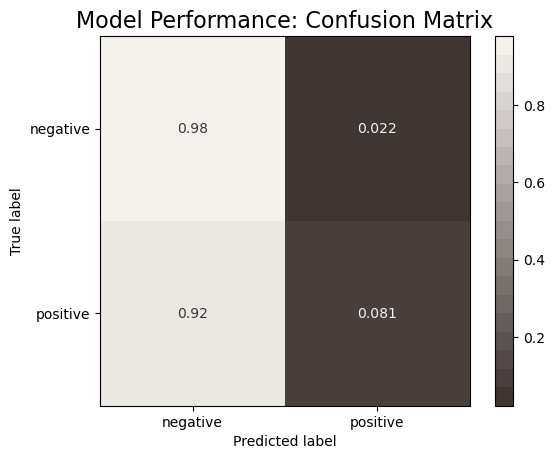

In [153]:
# Recording and displaying the confusion matrix
knn_confusion_matrix = confusion_matrix_display(knn_pipeline, y_test, knn_y_pred)

The F1 score highly decreased compared to the Random Forest model. Indeed, the model correctly predicted 98% of negative tweets as negative - which makes sense: kNN looks at similar cases to make predictions. 

However the actual positive tweets predicted decreased to 8%. This model cannot be kept at the best one.

<a id='evaluation'></a>

## 6. Evaluation

### 6. a) Final Model and Classification Metrics

The model that predicts the most accurately the non functional wells is the **Random Forest** where Hyperparameters were tuned thanks to Combinatorics GridSearching. The best parameters found for this model were the following:

In [154]:
# Storing the best model in the associated variable
best_model = rf_pipeline

In [155]:
# Viewing the best parameters defined by Combinatoric Grid Searching 
best_tfidf_params = new_best_tfidf_params
print(list(best_tfidf_params.items())[:])

[('max_df', 0.7), ('max_features', None), ('min_df', 1), ('ngram_range', (2, 2)), ('stop_words', ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

### 6. b) Model Performance

    2) Evaluation Metrics

* Train data

In [156]:
# Naming the model and calling the function to evaluate it
best_model_name = 'RandomForest'


# Reminding the evaluation metrics for the model
print('Evaluation Metrics on Train Data')

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'F1-Score: {f1_rf:.4f}') 
print(f'Precision: {precision_rf:.4f}')
print(f'Mean Cross-Validated Accuracy: {cv_rf:.4f}')

Evaluation Metrics on Train Data
Accuracy: 0.6918
F1-Score: 0.6796
Precision: 0.6760
Mean Cross-Validated Accuracy: 0.6861


* Test data

As we have evaluated the models, we will run our function again. The same results are expected for the first 3 metrics, only the cross-validated accuracy should change as this one will be evaluated on the test, unseen data.

In [157]:
# Naming the model and calling the function to evaluate it
best_model_name = 'RandomForest'
# best_pipeline = 

print('Evaluation Metrics on Unseen Data')
print()
# Calling the function and recording into the defined values
test_accuracy_best, test_precision_best, test_f1_best, test_cv_best = evaluation_metrics(
    y_test,
    rf_y_pred,
    best_model,
    X_test['tweet_original'],
    y_test
)

Evaluation Metrics on Unseen Data

Accuracy: 0.6918
F1-Score: 0.6796
Precision: 0.6760
Mean Cross-Validated Accuracy: 0.6631


The model is slightly overfitting, which suggests that the model may be capturing noise in the training data that doesn't generalize well to unseen data. This might be due to undersampling of negative tweets. In a further modelling process, two options should be considered:
1. Stratified Undersampling
<br>Stratified undersampling may protect from the importance given to single words, by keeping the ratio of words or token
2. Synthetic Minority Oversampling
<br> In addition to undersampling tweets to a certain level, positive tweets should be synthetically oversampled as well to try to draw better results. 

    3) Classification Report

In [158]:
# Calling the function
rf_class_report = class_calculation(y_test, rf_y_pred)

Classification Report:
               precision    recall  f1-score   support

    negative    0.74294   0.82820   0.78326      1525
    positive    0.53873   0.41184   0.46682       743

    accuracy                        0.69180      2268
   macro avg    0.64084   0.62002   0.62504      2268
weighted avg    0.67604   0.69180   0.67959      2268



    4) Confusion Matrix

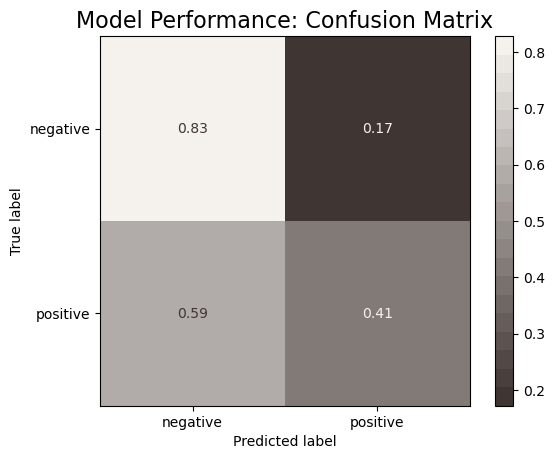

In [159]:
# Recording and displaying the confusion matrix
rf_confusion_matrix = confusion_matrix_display(best_model, y_test, rf_y_pred)

The classification report and confusion matrix summarize the evaluation of the model's performance on predicting sentiment for tweets related to technology brands (here, Google and Apple) during the SXSW conference. 

The model performs better on predicting *negative* sentiment tweets compared to *positive* sentiment tweets, and this is reflected in all scores. 
F1 is the highest recorded among all models. This score is particularly useful in this dataset, as it is imbalanced, and because it considers both false positives and false negatives. 
The overall weighted accuracy for this model is slightly below 70%. 


Looking at the details by metric: 

<u>F1-Score</u>:
F1-score is the harmonic mean of precision and recall. It was defined as the main metric for this project, as the cost of false negative and false positive was similar, in the sense that both positive and negative tweets need to be accurately predicted. 

The average weighted score recorded for F1 for the random forest model was the highest recorded, despite a larger disparity between F1 score for positive tweets and for negative tweets are more accurately predicted than positive tweets, which provides better scores for negative tweets than positive on all fronts, F1 being one of them. 

<u>Precision</u>:
Precision measures the accuracy of the positive predictions made by the model. Precision focuses on minimizing false positives. A high precision indicates that when the model predicts a positive class, it is likely to be correct. This balances a lower recall for positive tweets, since about 54% of positive tweets predicted as positive, are likely to be correctly identified as such. 

<u>Recall</u>:
Recall measures the ability of the model to capture all the positive instances in the dataset (true positives). Once again, negative tweets are more accurately predicted than positive ones. This can be seen on the confusion matrix on the top left corner. 83% of negative tweets are correctly predicted, while less than 41% of positive tweets are correctly predicted. 

<u>Accuracy</u>:
Finally, accuracy measures the overall correctness of the model predictions. Close to 70% of all tweets were correctly identified.

In [160]:
# Storing all models metrics into corresponding lists 
models = [baseline_model_name, resampled_model_name, nostop_model_name, preprocessed_model_name, tuned_model_name, dt_model_name, rf_tuned_model_name, knn_tuned_model_name] 
accuracy_metrics = [accuracy_base, accuracy_rs, accuracy_nostop, accuracy_pp, accuracy_gs, accuracy_dt, accuracy_rf, accuracy_knn]
precision_metrics = [precision_base, precision_rs, precision_nostop, precision_pp, precision_gs, precision_dt, precision_rf, precision_knn]
f1_metrics = [f1_base,  f1_rs, f1_nostop, f1_pp, f1_gs, f1_dt, f1_rf, f1_knn]
cv_metrics = [cv_base, cv_rs, cv_nostop, cv_pp, cv_gs, cv_dt, cv_rf, cv_knn]


In [161]:
# Verifying that all lists have the same size
# print(len(models))
# print()
# print(len(accuracy_metrics))
# print()
# print(len(precision_metrics))
# print()
# print(len(f1_metrics))
# print()
# print(len(cv_metrics))
# print()

In [162]:
# Creating a DataFrame with stored best scores 
models = models

data = {
    'Model': models,
    'Accuracy': accuracy_metrics,
    'F1': f1_metrics,
    'Precision': precision_metrics,
    'Cross-val accuracy': cv_metrics
}

overall = pd.DataFrame(data)

In [163]:
# Inspecting the newly created dataframe
overall

,Model,Accuracy,F1,Precision,Cross-val accuracy
0,Baseline,0.672399,0.452120,0.540684,0.672596
1,Resampled,0.569224,0.580552,0.603026,0.570564
2,No Stopwords,0.599206,0.606697,0.618308,0.603642
3,Preprocessed,0.576720,0.588669,0.615958,0.588793
4,NaiveBayes,0.663139,0.671148,0.688551,0.649078
5,DecisionTree,0.675044,0.672073,0.669729,0.663188
6,RandomForest,0.691799,0.679591,0.676042,0.686125
7,kNN,0.683862,0.670260,0.589031,0.681271


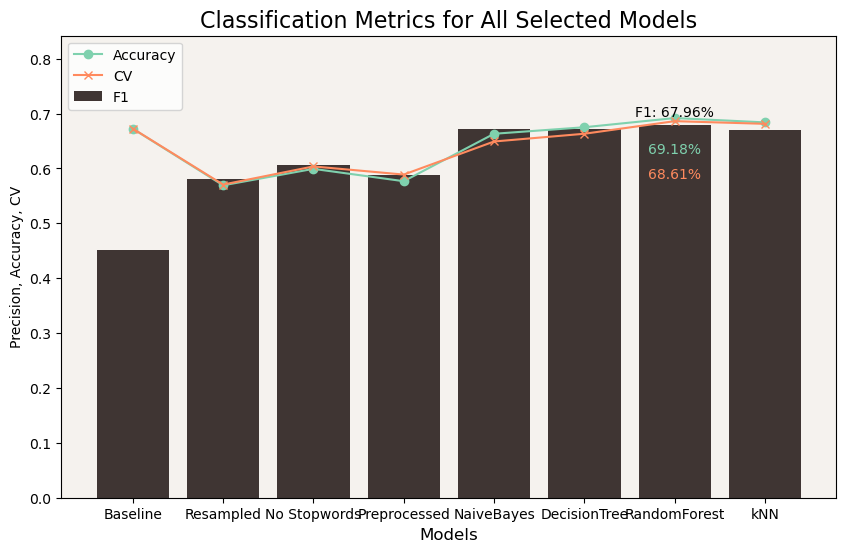

<Figure size 640x480 with 0 Axes>

In [164]:
# Creating a bar chart to review all

#  Creating a bar chart for Precision
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# plt.figure(figsize=(10, 6))
plt.bar(overall['Model'], overall['F1'], color='#3F3533', label='F1')

# Creating line plots for Log Loss and Accuracy
plt.plot(overall['Model'], overall['Accuracy'], marker='o', color='#7FD1AE', label='Accuracy')
plt.plot(overall['Model'], overall['Cross-val accuracy'], marker='x', color='#FF8A5E', label='CV')

# Setting labels and title
plt.xlabel('Models', fontsize=12)
# plt.ylabel('Precision')
plt.ylabel('Precision, Accuracy, CV')


    
# Annotating the last index of each category
plt.annotate(f'F1: {f1_metrics[6] * 100:.2f}%', (models[6], f1_metrics[6] + 0.01), ha='center', va='bottom')
plt.annotate(f'{accuracy_metrics[6] * 100:.2f}%', (models[6], overall['Accuracy'][6] - 0.07), ha='center', va='bottom', color='#7FD1AE')
plt.annotate(f'{cv_metrics[6] * 100:.2f}%', (models[6], overall['Cross-val accuracy'][6] - 0.11), ha='center', va='bottom', color='#FF8A5E')


    
# Defining the max value of y 
max_y = max(overall[['F1', 'Accuracy']].max())
plt.ylim(0, max_y  + 0.15)
plt.title('Classification Metrics for All Selected Models', fontsize=16)

# Displaying the legend
plt.legend(loc='upper left')

ax.set_facecolor('#F5F2EE')
# Saving the plot as a PNG with a transparent background
# plt.savefig('images/final_model.png')


plt.figure().patch.set_facecolor('#F5F2EE')

# Showing the plot
plt.tight_layout()
plt.show()

<u>Summarizing the 4 classification modeling</u>

In [165]:
# To represent the above graph more easily on the client's presentation, we will store only the 4 different classifiers 
the_4_models = overall[4:]

In [166]:
# Verifying the 4 different classifiers 
the_4_models

,Model,Accuracy,F1,Precision,Cross-val accuracy
4,NaiveBayes,0.663139,0.671148,0.688551,0.649078
5,DecisionTree,0.675044,0.672073,0.669729,0.663188
6,RandomForest,0.691799,0.679591,0.676042,0.686125
7,kNN,0.683862,0.670260,0.589031,0.681271


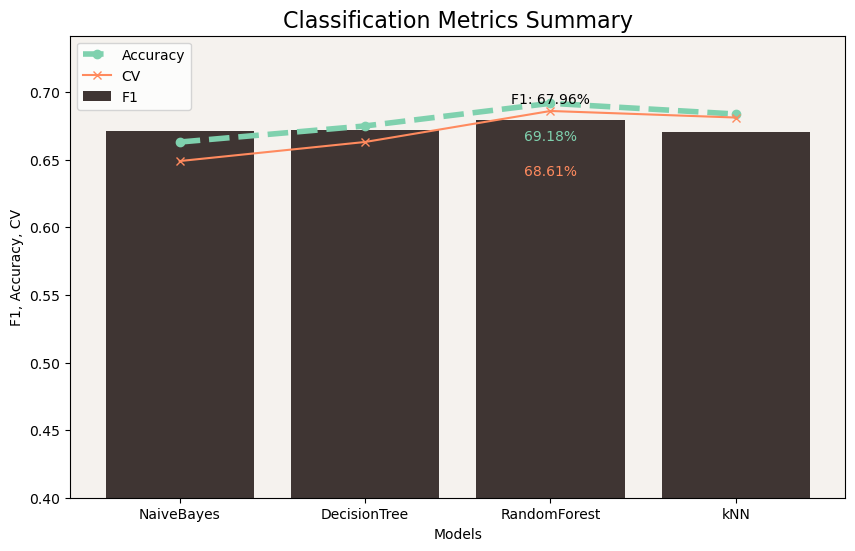

In [167]:
# Creating a bar chart to review all

# Creating a bar chart for F1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# plt.figure(figsize=(10, 6))
plt.bar(the_4_models['Model'], the_4_models['F1'], color='#3F3533', label='F1')

# Creating line plots for Log Loss and Accuracy
plt.plot(the_4_models['Model'], the_4_models['Accuracy'], marker='o', color='#7FD1AE', label='Accuracy', linewidth=4, linestyle='--')
plt.plot(the_4_models['Model'], the_4_models['Cross-val accuracy'], marker='x', color='#FF8A5E', label='CV')

# Setting labels and title
plt.xlabel('Models')
# plt.ylabel('F1')
plt.ylabel('F1, Accuracy, CV')

# Annotating the last index of each category
plt.annotate(f'F1: {f1_metrics[6] * 100:.2f}%', (models[6], f1_metrics[6] + 0.01), ha='center', va='bottom')
plt.annotate(f'{accuracy_metrics[6] * 100:.2f}%', (models[6], the_4_models['Accuracy'][6] - 0.03), ha='center', va='bottom', color='#7FD1AE')
plt.annotate(f'{cv_metrics[6] * 100:.2f}%', (models[6], the_4_models['Cross-val accuracy'][6] - 0.05), ha='center', va='bottom', color='#FF8A5E')

# Defining the max value of y
max_y = max(the_4_models[['F1', 'Accuracy']].max())
plt.ylim(0.4, max_y  + 0.05)
plt.title('Classification Metrics Summary', fontsize=16)

# Displaying the legend
plt.legend(loc='upper left')

ax.set_facecolor('#F5F2EE')
# Saving the plot as a PNG with a transparent background
plt.savefig('images/the_4_models.png', transparent=True)

# Showing the plot
plt.show()


<a id='findings_n_recommendations'></a>

## 7. Findings & Recommendations

### 7. a) Most Important Features

In [168]:
# Defining a colormap specifically for the top features bar graph
custom_colors = ['#CCCEC5', '#B3A6A4', '#8A7E7C', '#635856', '#3F3533']

n_bins = 200

# Creating the custom colormap
features_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=n_bins)

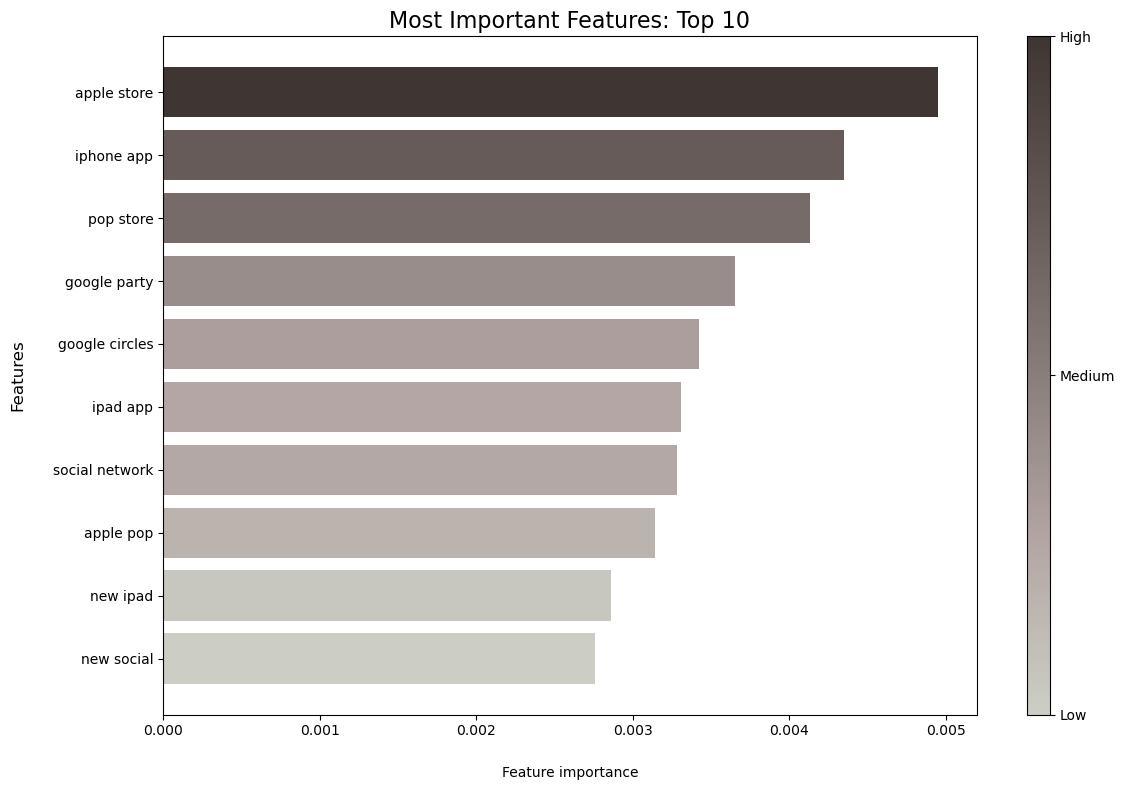

In [169]:
# Importing relevant packages
from matplotlib.cm import ScalarMappable


# Visualizing feature importances with automatically determined colors and sorted in descending order
def plot_top_feature_importances(pipeline, top_n):
    # Accessinf the classifier instance from the pipeline
    classifier = pipeline.named_steps['classifier']
    
    # Getting the feature names from the vectorizer
    feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

    # Getting the feature importances
    feature_importances = classifier.feature_importances_

    # Sorting feature importances in descending order and get the corresponding indices
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Selecting the top 'top_n' features
    top_indices = sorted_indices[:top_n]

    # Sorting the feature names based on the selected top indices
    top_feature_names = feature_names[top_indices]

    # Sorting the feature importances for the selected top features
    top_feature_importances = feature_importances[top_indices]

    # Reverse the order to make it descending
    top_feature_names = top_feature_names[::-1]
    top_feature_importances = top_feature_importances[::-1]
    

    # Creating a colormap
    cmap = plt.get_cmap(features_cmap)

    # Manually normalizing importance values
    normalized_importances = (top_feature_importances - np.min(top_feature_importances)) / (np.max(top_feature_importances) - np.min(top_feature_importances))

    # Creating the figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Using normalized_importances directly for color mapping
    bars = ax.barh(range(top_n), top_feature_importances, align='center', color=cmap(normalized_importances))
    plt.yticks(range(top_n), top_feature_names)
    plt.xlabel('Feature importance', labelpad=20)
    plt.ylabel('Features', fontsize=12, labelpad=20)
    plt.title('Most Important Features: Top {}'.format(top_n), fontsize=16)

    # Adding a colorbar to the right of the plot
    sm = ScalarMappable(cmap=cmap)
    sm.set_array([])
    colorbar = plt.colorbar(sm, ax=ax, orientation='vertical', aspect=30)
    # Hide colorbar ticks
    # Defining custom tick positions
    custom_ticks = [0, 0.5, 1]
    custom_ticklabels = ['Low', 'Medium', 'High']
    colorbar.set_ticks(custom_ticks)
    colorbar.set_ticklabels(custom_ticklabels)
    plt.tight_layout()
    # Saving the plot as PNG with a transparent background
    plt.savefig('images/most_important_features.png', transparent=True)
    
    # Showing the plot 
    plt.show()
    return top_feature_names[::-1] 
    

# Calling the function with the best model
top_10_features = plot_top_feature_importances(best_model, top_n=10)

The most important features for the model help us gather the main themes and make the recommendations previously identified, more precise: 


1. apple store, pop up store, apple pop: 
    <br>Attendees were impressed with the how long lines were becoming to buy the new ipad. 
    <br>This created even more curiosity and people wanted even more to be among the first ones to buy the new iPad 2.
2. iphone app, ipad app: 
    <br> The app created for the SXSW conference was highly appreciated
    <br> It made attendees talk about the brand: this is an easy way to create 'free' communication around your brand
3. google circles, social network: 
    <br> The new social network created by Google created eagerness. 
    <br> Social networks since 2013 have highly evolved and this market has reached its maturity. 
    <br>Instead, the recommendation here would be to build a hashtag to hope to win the new tablet at the event 
4. google party:
    <br>The party was highly enjoyed. To ensure attendees go to the party, mix the previous recommendation with the party: use the hashtag created for the chance to get access to concert, where the tablet will be released. 
    

In [170]:
# Inspecting the returned top 10 features 
top_10_features

array(['apple store', 'iphone app', 'pop store', 'google party',
       'google circles', 'ipad app', 'social network', 'apple pop',
       'new ipad', 'new social'], dtype=object)

We will now create X_positive DataFrame. This will allow us to review the tweets for each the top 10 features by importance. 

In [171]:
# Creating  dataframe to glance through the tweets containing the top 10 most important features to validate our recommendations  
X_positive = X_train[y_train == 'positive']

In [172]:
X_positive[X_positive['tweet_original'].str.contains('apple store')].head()

,tweet,product_or_company,tweet_original,tokenized_tweet,label
3689,"[wait, line, apple, store, ipad]",iPad,Wait in line at #SXSW apple store for iPad 2,wait line apple store ipad,positive
1249,"[expecting, see, flood, shiny, new, ipad2, today, line, apple, store, around, block]",iPad,Expecting to see a flood of shiny new ipad2's today @mention Line at apple store was around the block #sxsw,expecting see flood shiny new ipad2 today line apple store around block,positive
4729,"[seeing, ton, ipad2s, around, guess, took, long, get, apple, store, line]",iPad,Seeing tons of iPad2s around. Guess it just took that long to get through the #SXSW apple store line (@mention,seeing ton ipad2s around guess took long get apple store line,positive
4866,"[excited, meet, team, way, apple, store, go, download, app]",iPad or iPhone App,Excited to meet the @mention team on the way to the apple store. Go download their app if you're in #sxsw! {link},excited meet team way apple store go download app,positive
7412,"[apple, store, buying, ipad, guess, geek, drunk, hahaha]",undefined,At the apple store with @mention he's buying an iPad...I guess this is what geeks do when they're drunk hahaha #sxsw,apple store buying ipad guess geek drunk hahaha,positive


In [173]:
# Inspecting the tweets related to top 10 features  
for feature in top_10_features:
    print(feature.upper())
    print()
    print(X_positive[X_positive['tweet_original'].str.contains(feature)][['tweet_original']][:10])

APPLE STORE

                                                                                                                          tweet_original
3689                                                                                        Wait in line at #SXSW apple store for iPad 2
1249                         Expecting to see a flood of shiny new ipad2's today @mention Line at apple store was around the block #sxsw
4729                      Seeing tons of iPad2s around. Guess it just took that long to get through the #SXSW apple store line (@mention
4866                  Excited to meet the @mention team on the way to the apple store. Go download their app if you're in #sxsw!  {link}
7412                At the apple store with @mention he's buying an iPad...I guess this is what geeks do when they're drunk hahaha #sxsw
4910               Speaking of #sxsw: how about that #apple store on 6th and congress? Wouldn't it be great if it were permanent....? ;)
7628           Apple Store i

In [174]:
# Getting the vectorized tweets as an array and transforming it to a list
feature_names_list = rf_pipeline.named_steps['tfidf'].get_feature_names_out().tolist()

# Concatenating the feature names into a single string
vectorized_tweets = ' '.join(feature_names_list)

In [175]:
# Creating an empty DataFrame to store the tweets related to the top features
dfs_to_concat = []

# Iterating through the top features
for feature_name in top_10_features:
    # Filter tweets containing the current top feature
    matching_tweets = X_positive[X_positive['tweet_original'].str.contains(feature_name)]
    
    # Appending matching tweets to the list
    dfs_to_concat.append(matching_tweets)

# Concatenating the list of DataFrames into a single DataFrame
X_positive_top_features = pd.concat(dfs_to_concat, ignore_index=True)

# Print or use X_positive_top_features as needed
X_positive_top_features


,tweet,product_or_company,tweet_original,tokenized_tweet,label
0,"[wait, line, apple, store, ipad]",iPad,Wait in line at #SXSW apple store for iPad 2,wait line apple store ipad,positive
1,"[expecting, see, flood, shiny, new, ipad2, today, line, apple, store, around, block]",iPad,Expecting to see a flood of shiny new ipad2's today @mention Line at apple store was around the block #sxsw,expecting see flood shiny new ipad2 today line apple store around block,positive
2,"[seeing, ton, ipad2s, around, guess, took, long, get, apple, store, line]",iPad,Seeing tons of iPad2s around. Guess it just took that long to get through the #SXSW apple store line (@mention,seeing ton ipad2s around guess took long get apple store line,positive
3,"[excited, meet, team, way, apple, store, go, download, app]",iPad or iPhone App,Excited to meet the @mention team on the way to the apple store. Go download their app if you're in #sxsw! {link},excited meet team way apple store go download app,positive
4,"[apple, store, buying, ipad, guess, geek, drunk, hahaha]",undefined,At the apple store with @mention he's buying an iPad...I guess this is what geeks do when they're drunk hahaha #sxsw,apple store buying ipad guess geek drunk hahaha,positive
...,...,...,...,...,...
96,"[hot, rumor, google, new, social, network, google, circle, photo, video, status, sharing]",undefined,"#sxsw hot rumor about Google's new social network &quot;Google Circles&quot; {link} (photo, video, status sharing)",hot rumor google new social network google circle photo video status sharing,positive
97,"[strong, rumour, abt, google, unveiling, new, social, network, called, circle, look, interesting]",Other Google product or service,RT @mention Strong rumours abt Google unveiling a new social network called 'Circles' at #sxsw Does look interesting: {link},strong rumour abt google unveiling new social network called circle look interesting,positive
98,"[sound, intriguing, lot, chatter, around, google, new, social, network, circle, kek]",Other Google product or service,"Sounds intriguing... RT @mention Lots of chatter around Google's new social network, Circles #SXSW -KEK",sound intriguing lot chatter around google new social network circle kek,positive
99,"[google, denies, launch, major, new, social, network, circle, including, tim, reily, say, exists, awesome]",Other Google product or service,"Google denies it will launch major new social network, Circles, at #sxsw. But some, including Tim O'Reily, say it exists and is, awesome!",google denies launch major new social network circle including tim reily say exists awesome,positive


In [176]:
# Defining list of product or company name to remove
list_of_company_products = ['google', 'android', 'apple', 'ipad', 'iphone', 'ipad2', 'iphone ']

In [177]:
# Making a copy of the created DataFrame
nocomp_positive_top_features = X_positive_top_features.copy()
nocomp_positive_top_features[:3]

,tweet,product_or_company,tweet_original,tokenized_tweet,label
0,"[wait, line, apple, store, ipad]",iPad,Wait in line at #SXSW apple store for iPad 2,wait line apple store ipad,positive
1,"[expecting, see, flood, shiny, new, ipad2, today, line, apple, store, around, block]",iPad,Expecting to see a flood of shiny new ipad2's today @mention Line at apple store was around the block #sxsw,expecting see flood shiny new ipad2 today line apple store around block,positive
2,"[seeing, ton, ipad2s, around, guess, took, long, get, apple, store, line]",iPad,Seeing tons of iPad2s around. Guess it just took that long to get through the #SXSW apple store line (@mention,seeing ton ipad2s around guess took long get apple store line,positive


In [178]:
# Removing any word corresponding to product or company
nocomp_positive_top_features['tweet'] = nocomp_positive_top_features['tweet'].apply(
    lambda tweet_list: [word for word in tweet_list if word.lower() not in list_of_company_products]
)

In [179]:
# Inspecting the newly created column
nocomp_positive_top_features.head()

,tweet,product_or_company,tweet_original,tokenized_tweet,label
0,"[wait, line, store]",iPad,Wait in line at #SXSW apple store for iPad 2,wait line apple store ipad,positive
1,"[expecting, see, flood, shiny, new, today, line, store, around, block]",iPad,Expecting to see a flood of shiny new ipad2's today @mention Line at apple store was around the block #sxsw,expecting see flood shiny new ipad2 today line apple store around block,positive
2,"[seeing, ton, ipad2s, around, guess, took, long, get, store, line]",iPad,Seeing tons of iPad2s around. Guess it just took that long to get through the #SXSW apple store line (@mention,seeing ton ipad2s around guess took long get apple store line,positive
3,"[excited, meet, team, way, store, go, download, app]",iPad or iPhone App,Excited to meet the @mention team on the way to the apple store. Go download their app if you're in #sxsw! {link},excited meet team way apple store go download app,positive
4,"[store, buying, guess, geek, drunk, hahaha]",undefined,At the apple store with @mention he's buying an iPad...I guess this is what geeks do when they're drunk hahaha #sxsw,apple store buying ipad guess geek drunk hahaha,positive


In [180]:
# Concatenating all tweets into a single string
top_feature_tweets_nocomp = ' '.join(nocomp_positive_top_features['tweet'].apply(lambda x: ' '.join(map(str, x))))

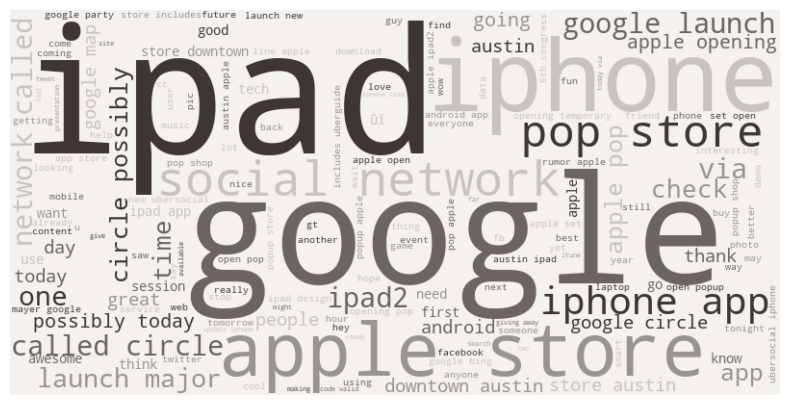

In [181]:
# Printing a new wordcloud to review if any visual representation can be easier this way
wordcloud_graph(top_feature_tweets_nocomp)

The main words that were identified before are confirmed visually here: the main reference is the ipad - which would be our intention for the folding tablet. 

The social network is identified again, which shows the enthusiasm around it. 

Similar approaches show for the apple store, the pop-up store and overall the fact that the launch was major. This is the kind of theme we want for Samsung. 

Nevertheless, without more contact, it is difficult to use this wordcloud on a presentation and understand why this helped us make recommendations, so this visual will not be used. 

### 7. b) Recommendations

To generate buzz around the launch of Samsung's new folding tablet, consider implementing the following key strategies:

1. In-Person Sales and Pop-Up Stores:

    * Offer exclusive early access to SXSW attendees, creating a sense of urgency and desire.
    * Establish pop-up stores within the conference venue to further engage and captivate potential buyers.
    * Foster anticipation by orchestrating lines, enhancing the overall attraction and exclusivity.
    * Innovative Conference App:

2. Develop a cutting-edge mobile app for both phones and tablets, enhancing conference access and engagement.
    * Leverage the app to tap into attendees' creativity, creating a platform for discussion and interaction.

3. Strategic Hashtag Campaign:
    * Take inspiration from the excitement around social network launches, such as Google Circles, by creating a dedicated hashtag.
    * Recognize the evolving landscape of social networks and harness the hashtag to generate excitement and participation.
    * Position the hashtag as a means to win the new tablet, fostering eagerness among the audience.

4. Exclusive Party Integration:

    * Utilize the app to create exclusivity, making it a prerequisite for access to an exclusive party.
    (Blend the party experience with the hashtag campaign, encouraging attendees to use the hashtag for a chance to access the tablet release concert).
    * Strive to surpass the success of the previous year's concert, ensuring the party becomes a highlight of the event.


These refined strategies aim to capture the essence of successful past events, combining physical presence, technological innovation, social media engagement, and exclusive experiences to maximize the impact of the tablet launch at the SXSW conference.

<a id='limits_n_next_steps'></a>

## 8. Limits & Next Steps

Despite providing us a good idea for recommendations, the accuracy and F1 score remain low, we would aim at reaching above 70%. 

To do this in the future we would:
* Synthetically Oversample the Minority class
<br> In addition to undersampling tweets to a certain level, positive tweets should be synthetically oversampled as well to try to draw better results. 

* Stratified Undersampling:
<br> Stratified undersampling may protect from the importance given to single words, by keeping the ratio of words or token

* Hyperparameters Tuning
<br> We searched best parameters for the vectorizer only, but not for the classifier. By changing these, the accuracy, could be improved 
